# Early prediction of cart abandonement


This shared task is a simplified version of the Coveo Data Challenge organised at the eCommerce workshop co-located with the Special Interest Group for Information Retrieval (SIGIR) Conference in July 2021 in Montreal. Your goal will be to perform early prediction about whether a user will abandon their cart in the current shopping session after at least a product has been added to the cart. This is therefore a binary classification problem: a session can either feature in the abandon category or in the purchase category.

You will have to implement four models to predict conversion:
1. an oracle model
2. a Naive Bayes model trained on hand-crafted features (listed below)
3. a Naive Bayes model trained on 4 grams
4. an experimental model of your choice

Your system will be evaluated at 10 clicks after the first add to cart in each session. If a session contains fewer events after the first add to cart before the session either stops or features a purchase, keep everything. To exemplify, suppose you have the following symbolised sessions in the original dataset (3 indicates add):

    A. 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1

    B. 1, 2, 3, 1, 1, 1, 4, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2

the same sessions in the evaluation set will look as follows:
    
    A. 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1       (only 5 events after the first add to cart, so keep everything)
    
    B. 1, 2, 3, 1, 1, 1, 4, 3, 2, 2, 1, 1, 1 (the following events are discarded to simulate early prediction)

You will receive a training set (to be pre-processed) right away and use it to develop your pipeline - pre-process the data, derive a development set to test your model implementations and develop the code you need to complete the later parts of the assignment. You will also immediately receive the evaluation sessions (already pre-processed in the appropriate ways, so one file for hand-crafted features and one for n-grams, with sessions trimmed after 10 events post add-to-cart), with no information about which are purchase sessions and which aren't. Use these files to make sure your pipeline can make predictions using those as input.

You need to return files with the predicted label for each session, as obtained by running the four aforementioned models. The prediction files need to be .json files containing dictionaries mapping session IDs (available in the pre-processed sessions) to the predicted label (0 or 1).

After the submission deadline, you will receive the true labels of the test sessions and you will have to send in a final file with the oracle prediction for the test sessions.

The two Naive Bayes models must be trained on the whole training corpus you receive, with no re-sampling and without cutting sessions at 10 events post add-to-cart. The oracle needs to be estimated on the full evaluation set. The experimental model can be trained following any strategy you observe to yield better results using the dev set you will set aside from the training set (remember to use the full training set to train models for submission though!).

You should carry out the following tasks:

0. pre-process the sessions in the training set. You will have to:
    - filter out all sessions which never feature an add-to-cart event
    - label the sessions (1: conversions; 0: cart-abandonement)
    - trim the purchase sessions to the last event before the first purchase
    - filter sessions that are too short (shorter than 5 events) or too long (longer than 100 events)
    - symbolise the sessions (map each event to an integer based on inverse frequency, so the most frequent event maps to 1, the second most frequent to 2, and so on).
    - for the dev set you set aside from the training set to develop the experimental model, remember to trim sessions at 10 events after the first add-to-cart to get a realistic estimate of your model performance, since the models are evaluated on early prediction!

Since the rest of the assignment relies on correctly performing pre-processing, you can submit your pre-processed training set on Canvas (there will be a dedicated assignment) and I will let you know if the output checks out so you can fix any problem in time. These steps don't award any point.


1. implement the Naive Bayes model trained on the following hand-crafted features
    - 'weekend': whether the session took place on a weekend (1) or not (0)
    - 'part_day': whether the session took place in the night (0.01am to 6am), in the morning (6.01am to noon), in the afternoon (12.01pm to 6pm), or in the evening (6.01pm to midnight). Encode night as 0, morning as 1, afternoon as 3, and evening as 4
    - 'nevents': the length of the session in actions
    - 'total_time': the length of the session in milliseconds
    - 'nproducts': the number of products SKUs checked in the session
    - 'nview': the number of view actions in the session after the first add to cart
    - 'ndetail': the number of detail actions in the session after the first add to cart
    - 'nremove': the number of remove actions in the session after the first add to cart
   
   and send in the predictions for the sessions in the eval set (as a .json file, see formatting requirements below). I will compare the predictions with my own implementation and award points if the F1 score of your predictions and mine match.
* <font color='red'>5 points if the F1 score is in a range of +/- 0.5 from the true value. If the f1 of your model falls within a +/- 1 F1 points interval, you will get 4 points, and so on (+/- 1.5 F1 points -> 3 points; +/- 2 F1 points -> 2 points; +/- 2.5 F1 points -> 1 points; > +/- 3 F1 points -> 0 points)</font>
    
    

2. implement the Naive Bayes model trained on 4-grams and send in the predictions for the sessions in the eval set (as a .json file, see formatting requirements below). I will compare the predictions with my own implementation and award points if the F1 score of your predictions and mine match.
* <font color='red'>5 points if the F1 score is in a range of +/- 0.5 from the true value. If the f1 of your model falls within a +/- 1 F1 points interval, you will get 4 points, and so on (+/- 1.5 F1 points -> 3 points; +/- 2 F1 points -> 2 points; +/- 2.5 F1 points -> 1 points; > +/- 3 F1 points -> 0 points)</font>



3. implement another model of your choice (an SVM, a Markov Chain, a neural network, an anomaly detection algorithm if you feel more adventurous, or something else) and send in the predictions for the sessions in the test set, again as a .json file. I release a raw evaluation set (with sessions trimmed before the first purchase and cut at 10 events after the first add to cart) so you can featurise the evaluation set in the appropriate way for you experimental model to work: you should again submit a .json file with the predicted label for each session. I will compare your predictions to the real labels and compute an f1 score. You are not allowed to use additional data sources other than the training set: your notebook has to run considering only the information provided in the file you downloaded from the WeTransfer link.
* <font color='red'>10 points available, which will be awarded to the group submitting the best performing model. The difference in f1 between the Naive Bayes model trained on hand-crafted features and the best submitted model will be divided in 10 equally-sized bins and each group will get as many points as the bin their model's f1 falls in (so if the Nayve Bayes model with hand-crafted features has an f1 of 0.3 and the best model achieves an f1 of 0.6, a model achieving an f1 of 0.5 would fall in the 7th bin, earning the group 7 points, whereas a model getting an f1 of 0.33 would fall in the first bin and thus earn the group 1 point). If you don't submit predictions or if your model does not outperform the baseline, no points will be awarded, even if the submitted notebook contains (working) code.</font>
    
    
    
4. implement an oracle model for symbolised sequences to get the upper bound on performance for the Naive Bayes model trained on ngrams and send in its predictions for the sessions in the test set, always as a .json file mapping session IDs to 0s and 1s (remember to round the oracle predictions!). I will compare the predictions with my own implementation.
* <font color='red'>3 points if the f1 of your oracle falls within +/- 0.5 points from my oracle; 2 points if your oracle falls within +/- 1 point from my oracle; 1 point if your oracle falls within +/- 1.5 points from my oracle; 0 points if your oracle is off by a wider margin.</font>



5. do error analysis on one of the models (can be any of the Naive Based models, your own proposed model, the oracle, or a comparison between different models) - hence, you do not need to implement an experimental model to do an error analysis.
* <font color='red'>7 points: you can use any approach, you will get points based on the conclusions you draw from the error analysis, there isn't a right or wrong here, but sensible or not). This should feature in the notebook: use the dev set as your eval data: in real life you should do this on the test set, but since the test set complete with true labels will be released late to ensure a fair evaluation procedure, you should inspect your models' behavior using the dev set.</font>



At the end of these four tasks you will thus have submitted 5 different files:
* the python notebook (naming convention: 'AoCD_assignment_group[groupID].ipynb')
* the predictions of the Naive Bayes model trained on hand-crafted features (naming convention: 'predictions_group[groupID]_handcrafted.json')
* the predictions of the Naive Bayes model trained on 4-grams (naming convention: 'predictions_group[groupID]_ngrams.json')
* the oracle predictions (naming convention: 'predictions_group[groupID]_oracle.json')
* the predictions of your proposed model (naming convention: 'predictions_group[groupID]_expModel.json')

Each prediction file should contain a simple Python dictionary mapping session IDs (keys, as strings - those found in the evaluation files I make available) to predictions (values, integers, either 0 (cart abandonment) or 1 (purchase)). Failing to adhere to this format will result in no points being awarded.

As an example, group1 should submit files named as follows:
- AoCD_assignment_group01.ipynb
- predictions_group01_handcrafted.json
- predictions_group01_ngrams.json
- predictions_group01_oracle.json
- predictions_group01_expModel.json

A sample prediction file is also made available with the other files, named _predictions_example.json_.


Make sure to indicate clearly in the notebook which output matches a certain task, using the task number. No points will be awarded if you fail to indicate which task a certain code-block or markdown cell is addressing.

You should submit a complete notebook. If dependencies are required to run your code, make sure to install them at the beginning of the notebook. The only input files should be the ones you receive from me. Make sure you comment the code explaining what happens (use doc-strings to define what functions do, inline comments for more detailed information inside functions, as well as markdown cells to highlight the flow). If you submit undocumented code, you will automatically fail the assignment.

You need 17 points out of 30 to pass, meaning that 17/30 translates to a 5.5/10. In principle you can pass if you get no points from the experimental model, but you have to complete other tasks nearly perfectly. We have seen how to pre-process the data, extract hand-crafted features, build an oracle model, how to extract n-grams from sessions, how to implement a Logistic Regression and a Naive Bayes Classifier, as well as a simple descriptive error analysis during the practicals, so you have a blueprint for most tasks.

IMPORTANT: I will consider predictions from one experimental model per group. You might have to test more than one (so derive a dev set from the training data to test different models), but only submit the one you think works best!! You can submit multiple times, but I'll consider the last file you submit (the last baseline predictions, the last experimental model predictions, the last oracle predictions, the last notebook).

Need to submit 4 predictions:
*   Oracle on test set
*   Train NB n-grams on entire training set after preprocessing
*   Train your own model: Can do anything you want with training set (Different preprocessing for example).

For NB N-gram:
Need to make N-gram of sequential data
How to encode it for N-grams(time-series)?

-Multinomial for FeaturizerNB
CompleentNB for n-gram


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/Data/training_data_subset.csv")


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/Data/raw_eval_at10.csv",delimiter="\t")

test_features=pd.read_json("/content/drive/MyDrive/AOCD_assignment/Data/eval_session_features_at10.json",orient='index')

import json

# Open the JSON file
with open('/content/drive/MyDrive/AOCD_assignment/Data/eval_labels_at10.json', 'r') as f:
    # Load the JSON data into a Python dictionary
    labels = json.load(f)

In [ ]:
labels=pd.DataFrame([labels]).transpose()

In [ ]:
print(len(df))
df["hashed_url"].isna().sum()


14449159


0

In [ ]:

labels = labels.rename(columns={0: "convert"})

# Replace True with 1 and False with 0 in the "convert" column
labels["convert"] = labels["convert"].replace({True: 1, False: 0})

# Now you have the desired DataFrame

labels

,convert
000010504025397b03290c7457e0e7ef7ae93529f21eae384b277d851ba71ca1,0
0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d21bd36dd07dc67e17c5,1
00029b95dceb71ae63445fb5fdc844104aabd047793277ecb947ed97a626383e,0
00030ffeaf340fe2ef44c91bca1a7cffd5f07d1a44a081db5931fe0c760ec7a7,0
00033552e32dc78efe6d25c503e53ca66cc7a4cfa26619130134d7d71a0395a5,0
...,...
fff47dd4116fa93c92712834971fa62a60cdc043d9c188f0f66d5c3e50fe550c,0
fff5bc417b741919142099f803c9fcafcc50ef6c7e666d313ddecf49a8633ea3,0
fff72d659c6b400b98cf5c1f2f0b68e666d1d10811a4ff2e3ea667fdacecfba0,0
fff7a31c1bbfea3ef1b023bdc89b2869d023cb9ed4ad3408ffbee5c8be94a56e,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df['page_id'] is a column with the page or product IDs
label_encoder = LabelEncoder()
df['page_id_encoded'] = label_encoder.fit_transform(df['hashed_url'])
# user_paths = df.groupby('session_id_hash')['page_id_encoded'].apply(list)


In [ ]:
# import pandas as pd

# # Let's assume your DataFrame `df` has the following columns:
# # 'session_id' - the identifier for the session
# # 'timestamp' - the timestamp for the event
# # 'page_id' - the identifier for the page

# # Make sure your DataFrame is sorted by session and timestamp
# # df = df.sort_values(by=['session_id', 'timestamp'])

# # Calculate the time difference between consecutive events within the same session
# df['time_spent_page'] = df.groupby('page_id_encoded')['timestamp'].diff()

# # The time spent on the last page of a session is usually unknown unless you have a session end event.
# # You can decide how to handle this; one approach is to assume a fixed time, set it to NaN, or backfill with the average.

# # Assuming 'timestamp' is a pandas datetime column, `diff()` gives the time difference as a pandas Timedelta.
# # Convert this to seconds or any other unit that makes sense for your analysis.
# df['time_spent'] = df['time_spent'].dt.total_seconds()

# # The first event of each session will have a NaN value for 'time_spent' since there's no previous event to compare with.
# # You might want to fill or drop these NaN values depending on your requirement.
# df['time_spent'] = df['time_spent'].fillna(0)  # Example: Fill with 0 if that's appropriate for your context

# # Now df['time_spent'] contains the time spent on each page.


In [ ]:
# user_paths.head()

session_id_hash
00000114e1075962f022114fcfc17f2d874e694ac5d2010985bbba0a595340db    [11024, 11024, 136348, 11244, 241105, 69975, 1...
00000277639fc5c6f816654b78bf3654ece7fd53a7338ffee6c34160f3c446c5         [69975, 68362, 126448, 68362, 207867, 68362]
00001355930ff05e66ab30bccff221c33eba90e1517397b2d7e45972957ebc3e                                           [841, 841]
000024f4f0071f59b3fde8d0bdf2517a3767f29ef25a90d9fc17b6b2d98ef167                    [69975, 52124, 3970, 3970, 52124]
000033a81d6ae0e9b6ad1952348a2759f14fd688095b6dd5414b83bf2fb9ebe7    [6741, 159607, 159607, 6741, 6741, 6741, 6741,...
Name: page_id_encoded, dtype: object

In [ ]:
# unique_page_ids = len(pd.unique(df['page_id_encoded']))
# unique_page_ids

264715

In [ ]:
print(df["product_sku_hash"].nunique())
df["hashed_url"].nunique()

20674


37884

In [ ]:
# import statements
import pandas as pd
import numpy as np

In [ ]:
# read in the train and evaluation datasets
# df_train =
# df_eval =

In [ ]:
# make sure to execute preprocessing steps in the same order as they are listed and to set aside a development
# set to check the performance of your classifiers (keep in mind that you should trim the sessions in your dev
# set to 10 events after the first add to cart to have a comparable evaluation as the chosen task!)
#

# remove NAs from 'product action'
df['product_action'] = df['product_action'].fillna('view')

In [ ]:
test_raw['product_action'] = test_raw['product_action'].fillna('view')

In [ ]:
df.tail(10)

NameError: name 'df' is not defined

In [ ]:
df['nevents'] = df['product_action'].apply(len)

In [ ]:
df['convert'] = np.where(df['product_action'].transform(lambda x: 'purchase' in x), 1, 0)

In [ ]:
df.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url,page_id_encoded,nevents
0,da2a3169afe2f7c5e1d172abbd418483056bae902f6585...,pageview,view,NaN,1550358404388,d37f603d410e900ee39a2994170670cde3e55a8a35efcd...,218742,4
1,da2a3169afe2f7c5e1d172abbd418483056bae902f6585...,event_product,detail,59b2c0292b47455092d07c27e80da9130faca4e79f0189...,1550358404388,d37f603d410e900ee39a2994170670cde3e55a8a35efcd...,218742,6
2,da2a3169afe2f7c5e1d172abbd418483056bae902f6585...,event_product,detail,7f5626cf0780cb6be28edd5b99cdaed4e65badb2166e72...,1550358413563,92b77633d47e4b2c570a40eb6030c771ab29c94a6bf8c3...,151793,6
3,da2a3169afe2f7c5e1d172abbd418483056bae902f6585...,pageview,view,NaN,1550358413563,92b77633d47e4b2c570a40eb6030c771ab29c94a6bf8c3...,151793,4
4,da2a3169afe2f7c5e1d172abbd418483056bae902f6585...,pageview,view,NaN,1550358439013,d37f603d410e900ee39a2994170670cde3e55a8a35efcd...,218742,4


In [ ]:
# create a column 'addcart' which is True if a session contains at least one add event and False otherwise
df['datetime'] = pd.to_datetime(df['server_timestamp_epoch_ms'], unit='ms')
df = df.groupby('session_id_hash')[["event_type",'product_action','product_sku_hash',"server_timestamp_epoch_ms",'datetime',"page_id_encoded"]].agg(list).reset_index()
df['addcart'] = np.where(df['product_action'].transform(lambda x: 'add' in x), 1, 0)
df.head()


,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,page_id_encoded,addcart
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[pageview, event_product, event_product, pagev...","[view, detail, add, view, view, view, view, vi...","[nan, cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c9...","[1552423391039, 1552423391039, 1552424389158, ...","[2019-03-12 20:43:11.039000, 2019-03-12 20:43:...","[11024, 11024, 136348, 11244, 241105, 69975, 1...",1
1,00000277639fc5c6f816654b78bf3654ece7fd53a7338f...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view]","[nan, nan, nan, nan, nan, nan]","[1551911408318, 1551911427489, 1551911435813, ...","[2019-03-06 22:30:08.318000, 2019-03-06 22:30:...","[69975, 68362, 126448, 68362, 207867, 68362]",0
2,00001355930ff05e66ab30bccff221c33eba90e1517397...,"[pageview, event_product]","[view, detail]","[nan, fa95869f053efcee615f4e02bc4fa8d13843b9e8...","[1554738829838, 1554738829838]","[2019-04-08 15:53:49.838000, 2019-04-08 15:53:...","[841, 841]",0
3,000024f4f0071f59b3fde8d0bdf2517a3767f29ef25a90...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, view]","[nan, nan, nan, 7b023d6c0c025887642f7ad0659016...","[1548870730572, 1548870778921, 1548870787877, ...","[2019-01-30 17:52:10.572000, 2019-01-30 17:52:...","[69975, 52124, 3970, 3970, 52124]",0
4,000033a81d6ae0e9b6ad1952348a2759f14fd688095b6d...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, view, vie...","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[1549385793807, 1549385833900, 1549385996788, ...","[2019-02-05 16:56:33.807000, 2019-02-05 16:57:...","[6741, 159607, 159607, 6741, 6741, 6741, 6741,...",0


In [ ]:
def time_since_last_event(dates):
    # Calculate the differences between consecutive dates and convert to a desired time unit, e.g., seconds
    return [(t - s).total_seconds() for s, t in zip(dates[:-1], dates[1:])]

In [ ]:
from itertools import accumulate

def cum_time(dates):
    # Calculate the differences between consecutive dates and convert to seconds
    time_diffs = [(t - s).total_seconds() for s, t in zip(dates[:-1], dates[1:])]

    # Calculate the cumulative sums of the time differences
    cumulative_diffs = list(accumulate(time_diffs))

    return cumulative_diffs


In [ ]:
df['time_since_last_event'] = df['datetime'].apply(time_since_last_event)
# df['cum_time'] = df['datetime'].apply(cum_time)

In [ ]:
df.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,page_id_encoded,addcart,time_since_last_event,cum_time
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[pageview, event_product, event_product, pagev...","[view, detail, add, view, view, view, view, vi...","[nan, cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c9...","[1552423391039, 1552423391039, 1552424389158, ...","[2019-03-12 20:43:11.039000, 2019-03-12 20:43:...","[11024, 11024, 136348, 11244, 241105, 69975, 1...",1,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031...","[0.0, 998.119, 1004.5550000000001, 1026.548, 1..."
1,00000277639fc5c6f816654b78bf3654ece7fd53a7338f...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view]","[nan, nan, nan, nan, nan, nan]","[1551911408318, 1551911427489, 1551911435813, ...","[2019-03-06 22:30:08.318000, 2019-03-06 22:30:...","[69975, 68362, 126448, 68362, 207867, 68362]",0,"[19.171, 8.324, 36.312, 27.362, 11.466]","[19.171, 27.494999999999997, 63.80699999999999..."
2,00001355930ff05e66ab30bccff221c33eba90e1517397...,"[pageview, event_product]","[view, detail]","[nan, fa95869f053efcee615f4e02bc4fa8d13843b9e8...","[1554738829838, 1554738829838]","[2019-04-08 15:53:49.838000, 2019-04-08 15:53:...","[841, 841]",0,[0.0],[0.0]
3,000024f4f0071f59b3fde8d0bdf2517a3767f29ef25a90...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, view]","[nan, nan, nan, 7b023d6c0c025887642f7ad0659016...","[1548870730572, 1548870778921, 1548870787877, ...","[2019-01-30 17:52:10.572000, 2019-01-30 17:52:...","[69975, 52124, 3970, 3970, 52124]",0,"[48.349, 8.956, 0.0, 15.893]","[48.349, 57.30499999999999, 57.30499999999999,..."
4,000033a81d6ae0e9b6ad1952348a2759f14fd688095b6d...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, view, vie...","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[1549385793807, 1549385833900, 1549385996788, ...","[2019-02-05 16:56:33.807000, 2019-02-05 16:57:...","[6741, 159607, 159607, 6741, 6741, 6741, 6741,...",0,"[40.093, 162.888, 6.021, 7.991, 44.966, 168.07...","[40.093, 202.981, 209.00199999999998, 216.993,..."


In [ ]:
# only keep sessions which feature at least an add event
df2=df[df["addcart"]==1]

In [ ]:
print(f"{len(df)-len(df2)} sessions deleted that do not contain add event")

1888464 sessions deleted that do not contain add event


In [ ]:
# you can check whether you successfully filtered out sessions with no add to cart by computing the mean
# of the 'addcart' column. It should yield 1.
df2["addcart"].mean()


1.0

In [ ]:
# create a column 'convert' which is True if a session contains at least a purchase event and False otherwise
df2['convert'] = np.where(df2['product_action'].transform(lambda x: 'purchase' in x), 1, 0)

<ipython-input-16-ae3d5a5c860a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['convert'] = np.where(df2['product_action'].transform(lambda x: 'purchase' in x), 1, 0)


In [ ]:
df2['session_length_precut'] = df2['product_action'].apply(len)

<ipython-input-17-26e28aaadcaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['session_length_precut'] = df2['product_action'].apply(len)


In [ ]:
df2.describe()

,addcart,convert,session_length_precut
count,86122.0,86122.000000,86122.000000
mean,1.0,0.213987,28.867757
std,0.0,0.410120,29.166011
min,1.0,0.000000,1.000000
25%,1.0,0.000000,10.000000
50%,1.0,0.000000,20.000000
75%,1.0,0.000000,37.000000
max,1.0,1.000000,202.000000


In [ ]:
# only keep events occurring before the first purchase, and the full session if no purchase is found.
# Create a new column 'session' using pandas apply function
df2['product_action'] = df2['product_action'].apply(lambda session: session[:session.index('purchase')] if 'purchase' in session else session)
df2['datetime'] = df2.apply(lambda row: row['datetime'][:len(row['product_action'])], axis=1)
df2['product_sku_hash'] = df2.apply(lambda row: row['product_sku_hash'][:len(row['product_action'])], axis=1)
df2['server_timestamp_epoch_ms'] = df2.apply(lambda row: row['server_timestamp_epoch_ms'][:len(row['product_action'])], axis=1)
# df2['hashed_url'] = df2.apply(lambda row: row['hashed_url'][:len(row['product_action'])], axis=1)
df2['event_type'] = df2.apply(lambda row: row['event_type'][:len(row['product_action'])], axis=1)
df2['time_since_last_event'] = df2.apply(lambda row: row['time_since_last_event'][:len(row['product_action'])], axis=1)
df2['page_id_encoded'] = df2.apply(lambda row: row['page_id_encoded'][:len(row['product_action'])], axis=1)
# df2['cum_time'] = df2.apply(lambda row: row['cum_time'][:len(row['product_action'])], axis=1)

df2["session_length_postcut"]=df2["product_action"].apply(len)
df2.tail(10)


<ipython-input-18-229ab8d5f3d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['product_action'] = df2['product_action'].apply(lambda session: session[:session.index('purchase')] if 'purchase' in session else session)
<ipython-input-18-229ab8d5f3d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.apply(lambda row: row['datetime'][:len(row['product_action'])], axis=1)
<ipython-input-18-229ab8d5f3d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,page_id_encoded,addcart,time_since_last_event,convert,session_length_precut,session_length_postcut
1974378,fff995594383b7896f42661a2d43775e68fba363ae98f0...,"[pageview, event_product, pageview, event_prod...","[view, detail, view, detail, detail, view, vie...","[nan, fed97f4537a34fc8f80506d0d723623f283bbfe6...","[1554732806002, 1554732806002, 1554732838425, ...","[2019-04-08 14:13:26.002000, 2019-04-08 14:13:...","[192431, 192431, 196763, 196763, 111771, 11177...",1,"[0.0, 32.423, 0.0, 5.17, 0.0, 8.749, 0.0, 53.9...",0,22,22
1974419,fffab0e4f62ce77794da1127a012f071338ae28e7e8816...,"[event_product, pageview, event_product, event...","[detail, view, add, remove, remove, view, view...",[d97fada9b28ff4f72665fa84adaac99be5b47448397dc...,"[1549845054761, 1549845054761, 1549845061939, ...","[2019-02-11 00:30:54.761000, 2019-02-11 00:30:...","[156416, 156416, 136348, 59156, 59156, 59156, ...",1,"[0.0, 7.178, 4.252, 0.18, 1.077, 15.811, 3.993...",1,74,66
1974454,fffc00fdf3a2ed4d51c8b802c3ffd5dc342d7876e5365e...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, view, vie...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1550504214666, 1550504223281, 1550504227062, ...","[2019-02-18 15:36:54.666000, 2019-02-18 15:37:...","[59156, 59156, 59156, 69975, 181948, 68362, 19...",1,"[8.615, 3.781, 8.265, 103.315, 16.249, 44.546,...",0,26,26
1974456,fffc125afd05c374d9c522e32552dfb998f618fe100cef...,"[event_product, pageview, event_product, pagev...","[detail, view, add, view]",[c86f693b736d3971549416d7d83f152536180e85c78d6...,"[1552447965572, 1552447965572, 1552447978561, ...","[2019-03-13 03:32:45.572000, 2019-03-13 03:32:...","[221340, 221340, 136348, 11244]",1,"[0.0, 12.989, 8.242]",0,4,4
1974457,fffc1f648ff20ea5625fa91b1239307e74d1d1e8faad5b...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, view, view, detail,...","[nan, nan, nan, 343109b2197c1c0a9beacde6a8f85f...","[1554238563265, 1554238569880, 1554238613953, ...","[2019-04-02 20:56:03.265000, 2019-04-02 20:56:...","[69975, 208060, 237037, 255960, 255960, 235155...",1,"[6.615, 44.073, 63.892, 0.0, 61.887, 0.0, 65.7...",1,115,86
1974484,fffccaf02659cd209eb5504ba532bbdabb712f830f3f51...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, add, detail, view, ...","[nan, nan, nan, 9fafaabbaf838a7dce14fd3c03bfa7...","[1551487744674, 1551487763112, 1551487781568, ...","[2019-03-02 00:49:04.674000, 2019-03-02 00:49:...","[238104, 88248, 230805, 230805, 136348, 51315,...",1,"[18.438, 18.456, 0.0, 121.923, 57.741, 0.0, 15...",0,19,19
1974514,fffddd06059048cc2ccc00160e50e0ed05d8f73f7ef49f...,"[pageview, event_product, event_product, pagev...","[view, detail, detail, view, detail, view, vie...","[nan, 26ce666181e06a5c1894c39e85f134c2479f7b1e...","[1553559802446, 1553559802446, 1553559806662, ...","[2019-03-26 00:23:22.446000, 2019-03-26 00:23:...","[31026, 31026, 203213, 203213, 31026, 31026, 2...",1,"[0.0, 4.216, 0.0, 6.29, 0.0, 5.448, 42.706, 0....",0,95,95
1974516,fffe10711d5b55829381151552ca72e07a85ae61e735fc...,"[pageview, event_product, event_product, event...","[view, detail, add, add, view, view, view]","[nan, 9e0dd96e141aeb5ff347822febcfe36c12c07dde...","[1554068584932, 1554068584932, 1554068652590, ...","[2019-03-31 21:43:04.932000, 2019-03-31 21:43:...","[201760, 201760, 136348, 136348, 59156, 59156,...",1,"[0.0, 67.658, 28.399, 6.329, 10.041, 23.7]",0,7,7
1974529,fffe474ed9f207fc66891586fb001542420e985510e447...,"[pageview, event_product, pageview, event_prod...","[view, add, view, detail, view, view, view, vi...","[nan, b71ab0a84b084aabf8e1034e34d032b673fcc589...","[1547903839432, 1547903849988, 1547903935570, ...","[2019-01-19 13:17:19.432000, 2019-01-19 13:17:...","[123473, 136348, 37750, 101159, 101159, 37750,...",1,"[10.556000000000001, 85.582, 7.249, 0.0, 6.705...",1,42,32
1974563,ff

In [ ]:
df2["nevents"]=df2["product_action"].apply(len)


<ipython-input-27-5fb07e14bc6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["nevents"]=df2["product_action"].apply(len)


In [ ]:
df2.head(5)

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url,datetime,addcart,convert,session_length_precut,session_length_postcut
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[pageview, event_product, event_product, pagev...","[view, detail, add, view, view, view, view, vi...","[nan, cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c9...","[1552423391039, 1552423391039, 1552424389158, ...",[0aa1084eddfb08e4dffbb5a2aa98a5e9679382d982dd9...,"[2019-03-12 20:43:11.039000, 2019-03-12 20:43:...",1,0,18,18
32,00010d84aca1294479304044207fd268f63228844779c6...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, view, view, view, v...","[nan, nan, nan, fcf59ea06e00b39e7474fbcab000e3...","[1548008872581, 1548009161452, 1548009170805, ...",[433b0e71df1fe9a8d1f45647545701f6108414c40eef7...,"[2019-01-20 18:27:52.581000, 2019-01-20 18:32:...",1,0,41,41
79,0002629c632e1d3211649ba4498194a13a280c35c6bd57...,"[pageview, event_product, pageview, pageview, ...","[view, detail, view, view, view, view, view, v...","[nan, 7b023d6c0c025887642f7ad0659016e9c6abde47...","[1549337250205, 1549337250205, 1549337294278, ...",[03de9d5e9e67adc45cd1d8db0359761cd5bb56af966d6...,"[2019-02-05 03:27:30.205000, 2019-02-05 03:27:...",1,1,58,44
140,0004be10f232d2ebd86be1c1c46dcf741ee77651bc550d...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, view, det...","[nan, nan, nan, nan, nan, nan, nan, 0cc3edfc43...","[1547947824159, 1547947858143, 1547947932628, ...",[3b093225e4f2784546b1d35f08842eb3902f7fe3678ef...,"[2019-01-20 01:30:24.159000, 2019-01-20 01:30:...",1,0,15,15
168,00057b97a81dbf743e2687b0fd43b67e86d5ced77c828d...,"[event_product, pageview, event_product, pagev...","[detail, view, add, view]",[a40576727b6507e41323e6e0b97d49bdf0a197a01dec1...,"[1550162642355, 1550162642355, 1550162651437, ...",[98d0bea1e201801ee82e12e779b7f606e844d86c77d10...,"[2019-02-14 16:44:02.355000, 2019-02-14 16:44:...",1,0,4,4


In [ ]:
print(len(df2["event_type"].iloc[2]))
# print(len(df2["hashed_url"].iloc[2]))
print(len(df2["product_action"].iloc[2]))
print(len(df2["product_sku_hash"].iloc[2]))
print(len(df2["server_timestamp_epoch_ms"].iloc[2]))
print(len(df2["datetime"].iloc[2]))

44
44
44
44
44


In [ ]:
df2.describe()

,addcart,nevents
count,37125.000000,37125.000000
mean,0.999542,18.714936
std,0.021394,11.569711
min,0.000000,6.000000
25%,1.000000,12.000000
50%,1.000000,16.000000
75%,1.000000,22.000000
max,1.000000,99.000000


In [ ]:
# filter sessions which are either too short (<5) or too long (>100)
del df2["session_length_precut"]
df2.rename(columns={'session_length_postcut': 'nevents'}, inplace=True)

<ipython-input-21-e171cdad2b27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'session_length_postcut': 'nevents'}, inplace=True)


In [ ]:
df.rename(columns={'session_length_precut': 'nevents'}, inplace=True)

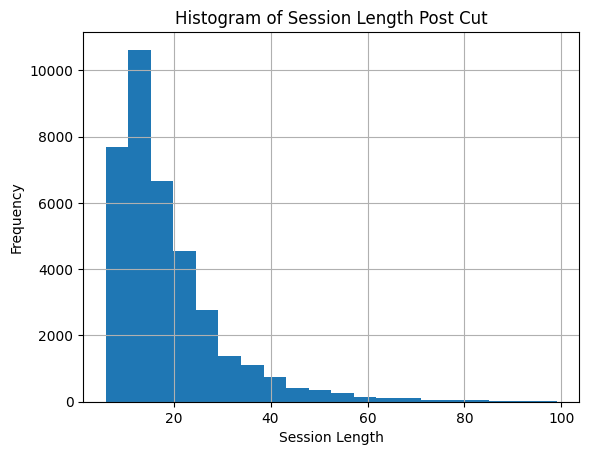

In [ ]:
# Since I cannot directly access the contents of your DataFrame, here is a general example
# of how you can plot a histogram of a column named "session_length_postcut" using pandas.

import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'session_length_postcut': [10, 20, 30, 20, 15, 25, 35, 20, 15, 10, 25, 30, 5, 40]
# })

# Now, let's say df is your actual DataFrame and 'session_length_postcut' is your column of interest.
# Plotting the histogram:
df2['nevents'].hist(bins=20)  # You can adjust the number of bins as needed
plt.title('Histogram of Session Length Post Cut')
plt.xlabel('Session Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df2=df2[df2["nevents"]>=1]
df2=df2[df2["nevents"]<=100]

In [ ]:
df2.describe()

,addcart,convert,nevents
count,83549.0,83549.000000,83549.000000
mean,1.0,0.212354,24.083699
std,0.0,0.408977,19.934737
min,1.0,0.000000,1.000000
25%,1.0,0.000000,9.000000
50%,1.0,0.000000,18.000000
75%,1.0,0.000000,33.000000
max,1.0,1.000000,100.000000


In [ ]:
# symbolize actions (map actions to integers by inverse frequency, so the most frequent event to 1, the next
# most frequent to 2, and so on...)
from collections import Counter

# Convert 'product_action' column to a list of sessions
sessions = df2['product_action'].tolist()

# Count the occurrences of each action
counts = Counter([item for session in sessions for item in session])
print(counts)
# Create a dictionary to map actions to their indices based on inverse frequencies
symbol2idx = {symbol: idx for idx, symbol in enumerate(sorted(counts, key=counts.get, reverse=True), 1)}
print(symbol2idx)
# Map the actions in each session to their corresponding indices
symbolised_sessions = [[symbol2idx[s] for s in session] for session in sessions]

# Create a new column with symbolized sessions
df2['product_action_symb'] = symbolised_sessions

df2.head()


Counter({'view': 1348621, 'detail': 449948, 'add': 121285, 'remove': 92315})
{'view': 1, 'detail': 2, 'add': 3, 'remove': 4}


,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,page_id_encoded,addcart,time_since_last_event,convert,nevents,product_action_symb
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[pageview, event_product, event_product, pagev...","[view, detail, add, view, view, view, view, vi...","[nan, cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c9...","[1552423391039, 1552423391039, 1552424389158, ...","[2019-03-12 20:43:11.039000, 2019-03-12 20:43:...","[11024, 11024, 136348, 11244, 241105, 69975, 1...",1,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031...",0,18,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ..."
32,00010d84aca1294479304044207fd268f63228844779c6...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, view, view, view, v...","[nan, nan, nan, fcf59ea06e00b39e7474fbcab000e3...","[1548008872581, 1548009161452, 1548009170805, ...","[2019-01-20 18:27:52.581000, 2019-01-20 18:32:...","[69975, 52124, 153959, 153959, 52124, 52124, 6...",1,"[288.871, 9.353, 0.0, 11.943, 28.894, 310.141,...",0,41,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ..."
79,0002629c632e1d3211649ba4498194a13a280c35c6bd57...,"[pageview, event_product, pageview, pageview, ...","[view, detail, view, view, view, view, view, v...","[nan, 7b023d6c0c025887642f7ad0659016e9c6abde47...","[1549337250205, 1549337250205, 1549337294278, ...","[2019-02-05 03:27:30.205000, 2019-02-05 03:27:...","[3970, 3970, 17467, 75308, 75308, 75308, 24051...",1,"[0.0, 44.073, 47.157, 5.913, 7.943, 43.287, 4....",1,44,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, ..."
140,0004be10f232d2ebd86be1c1c46dcf741ee77651bc550d...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, view, det...","[nan, nan, nan, nan, nan, nan, nan, 0cc3edfc43...","[1547947824159, 1547947858143, 1547947932628, ...","[2019-01-20 01:30:24.159000, 2019-01-20 01:30:...","[61310, 67044, 75476, 46821, 183927, 11434, 44...",1,"[33.984, 74.485, 37.651, 50.508, 41.415, 22.44...",0,15,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1]"
168,00057b97a81dbf743e2687b0fd43b67e86d5ced77c828d...,"[event_product, pageview, event_product, pagev...","[detail, view, add, view]",[a40576727b6507e41323e6e0b97d49bdf0a197a01dec1...,"[1550162642355, 1550162642355, 1550162651437, ...","[2019-02-14 16:44:02.355000, 2019-02-14 16:44:...","[157942, 157942, 136348, 247527]",1,"[0.0, 9.082, 82.927]",0,4,"[2, 1, 3, 1]"


In [ ]:
# filter the dev set by only keeping the first 10 events occurring after the first add to cart event

def keep_k_actions_after_first_target_event(dataframe,column,event,k):
    dataframe[column] = dataframe.apply(lambda row: row[column][:row[column].index(event) + k] if event in row[column] else row[column], axis=1)
keep_k_actions_after_first_target_event(df2,"product_action_symb",3,11)

df2["nevents"]=df2["product_action_symb"].apply(len)
df2['product_action'] = df2.apply(lambda row: row['product_action'][:len(row['product_action_symb'])], axis=1)
df2['datetime'] = df2.apply(lambda row: row['datetime'][:len(row['product_action_symb'])], axis=1)
df2['product_sku_hash'] = df2.apply(lambda row: row['product_sku_hash'][:len(row['product_action_symb'])], axis=1)
df2['event_type'] = df2.apply(lambda row: row['event_type'][:len(row['product_action_symb'])], axis=1)
df2['server_timestamp_epoch_ms'] = df2.apply(lambda row: row['server_timestamp_epoch_ms'][:len(row['product_action_symb'])], axis=1)
# df2['page_id_encoded'] = df2.apply(lambda row: row['page_id_encoded'][:len(row['product_action_symb'])], axis=1)
df2['time_since_last_event'] = df2.apply(lambda row: row['time_since_last_event'][:len(row['product_action_symb'])], axis=1)

df2.head()

<ipython-input-21-7ec594c16459>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = dataframe.apply(lambda row: row[column][:row[column].index(event) + k] if event in row[column] else row[column], axis=1)
<ipython-input-21-7ec594c16459>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["nevents"]=df2["product_action_symb"].apply(len)
<ipython-input-21-7ec594c16459>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,addcart,time_since_last_event,convert,nevents,product_action_symb
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[pageview, event_product, event_product, pagev...","[view, detail, add, view, view, view, view, vi...","[nan, cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c9...","[1552423391039, 1552423391039, 1552424389158, ...","[2019-03-12 20:43:11.039000, 2019-03-12 20:43:...",1,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031...",0,13,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]"
32,00010d84aca1294479304044207fd268f63228844779c6...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, view, view, view, v...","[nan, nan, nan, fcf59ea06e00b39e7474fbcab000e3...","[1548008872581, 1548009161452, 1548009170805, ...","[2019-01-20 18:27:52.581000, 2019-01-20 18:32:...",1,"[288.871, 9.353, 0.0, 11.943, 28.894, 310.141,...",0,27,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ..."
79,0002629c632e1d3211649ba4498194a13a280c35c6bd57...,"[pageview, event_product, pageview, pageview, ...","[view, detail, view, view, view, view, view, v...","[nan, 7b023d6c0c025887642f7ad0659016e9c6abde47...","[1549337250205, 1549337250205, 1549337294278, ...","[2019-02-05 03:27:30.205000, 2019-02-05 03:27:...",1,"[0.0, 44.073, 47.157, 5.913, 7.943, 43.287, 4....",1,24,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, ..."
140,0004be10f232d2ebd86be1c1c46dcf741ee77651bc550d...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, view, det...","[nan, nan, nan, nan, nan, nan, nan, 0cc3edfc43...","[1547947824159, 1547947858143, 1547947932628, ...","[2019-01-20 01:30:24.159000, 2019-01-20 01:30:...",1,"[33.984, 74.485, 37.651, 50.508, 41.415, 22.44...",0,15,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1]"
168,00057b97a81dbf743e2687b0fd43b67e86d5ced77c828d...,"[event_product, pageview, event_product, pagev...","[detail, view, add, view]",[a40576727b6507e41323e6e0b97d49bdf0a197a01dec1...,"[1550162642355, 1550162642355, 1550162651437, ...","[2019-02-14 16:44:02.355000, 2019-02-14 16:44:...",1,"[0.0, 9.082, 82.927]",0,4,"[2, 1, 3, 1]"


In [ ]:
df2.describe()

,addcart,convert,nevents
count,86122.0,86122.000000,86122.000000
mean,1.0,0.213987,18.161411
std,0.0,0.410120,14.387049
min,1.0,0.000000,0.000000
25%,1.0,0.000000,10.000000
50%,1.0,0.000000,15.000000
75%,1.0,0.000000,22.000000
max,1.0,1.000000,199.000000


In [ ]:
# set aside a dev set for testing models!
from sklearn.model_selection import train_test_split

train,val  = train_test_split(df2, test_size=0.2, random_state=123)

In [ ]:
labels.head()

,convert
000010504025397b03290c7457e0e7ef7ae93529f21eae384b277d851ba71ca1,0
0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d21bd36dd07dc67e17c5,1
00029b95dceb71ae63445fb5fdc844104aabd047793277ecb947ed97a626383e,0
00030ffeaf340fe2ef44c91bca1a7cffd5f07d1a44a081db5931fe0c760ec7a7,0
00033552e32dc78efe6d25c503e53ca66cc7a4cfa26619130134d7d71a0395a5,0


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and labels is the DataFrame containing labels
# Merge the two DataFrames based on the index of labels and the "session_id_hash" column of df
df2 = pd.merge(df2, labels, left_on="session_id_hash", right_index=True)

# Now you have the merged DataFrame
df2.head()



,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,page_id_encoded,addcart,time_since_last_event,cum_time,nevents,product_action_symb,convert
0,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[event_product, pageview, event_product, pagev...","[detail, view, detail, view, detail, view, vie...",[4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface...,"[1550148170683, 1550148170683, 1550148176362, ...","[2019-02-14 12:42:50.683000, 2019-02-14 12:42:...","[12673, 12673, 4976, 4976, 8503, 8503, 22794, ...",1,"[0.0, 5.679, 0.0, 4.032, 0.0, 4.651, 43.525, 0...","[0.0, 5.679, 5.679, 9.711, 9.711, 14.362, 57.8...",33,"[2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, ...",0
1,0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d2...,"[pageview, pageview, pageview, pageview, event...","[view, view, view, view, detail, add, remove, ...","[nan, nan, nan, nan, 8072c35d412f93abf10c97f25...","[1550494322923, 1550494357775, 1550494367667, ...","[2019-02-18 12:52:02.923000, 2019-02-18 12:52:...","[10003, 2936, 19819, 22459, 22459, 19521, 1644...",1,"[34.852, 9.892, 17.623, 0.0, 94.796, 4.921, 1....","[34.852, 44.744, 62.367000000000004, 62.367000...",16,"[1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 1, 4, 4, 4, 1]",1
2,00029b95dceb71ae63445fb5fdc844104aabd047793277...,"[pageview, pageview, pageview, pageview, event...","[view, view, view, view, detail, view, view, d...","[nan, nan, nan, nan, 9588565cc89c6ddfd125db40a...","[1555008904032, 1555008921817, 1555008991928, ...","[2019-04-11 18:55:04.032000, 2019-04-11 18:55:...","[18699, 5441, 35869, 28621, 24917, 24917, 1851...",1,"[17.785, 70.111, 7.879, 17.982, 0.0, 11.284, 0...","[17.785, 87.896, 95.775, 113.757, 113.757, 125...",31,"[1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, ...",0
3,00030ffeaf340fe2ef44c91bca1a7cffd5f07d1a44a081...,"[pageview, event_product, event_product, pagev...","[view, detail, add, view, remove, add, remove,...","[nan, e1d00eae573227a9caf2fc716edccfdf91678c32...","[1553649711543, 1553649711543, 1553649730373, ...","[2019-03-27 01:21:51.543000, 2019-03-27 01:21:...","[18943, 18943, 19521, 37823, 19521, 19521, 849...",1,"[0.0, 18.83, 8.853, 62.531, 0.368, 13.291, 15....","[0.0, 18.83, 27.683, 90.214, 90.582, 103.87299...",13,"[1, 2, 3, 1, 4, 3, 4, 1, 1, 1, 2, 1, 2]",0
4,00033552e32dc78efe6d25c503e53ca66cc7a4cfa26619...,"[event_product, pageview, pageview, event_prod...","[detail, view, view, detail, detail, view, add...",[e623f2601118cb2554eee6eacd24fe29bbd53a575f98d...,"[1553544174436, 1553544174436, 1553544342776, ...","[2019-03-25 20:02:54.436000, 2019-03-25 20:02:...","[2972, 2972, 25906, 25906, 2972, 2972, 19521, ...",1,"[0.0, 168.34, 0.0, 7.84, 0.0, 75.172, 5.839, 1...","[0.0, 168.34, 168.34, 176.18, 176.18, 251.352,...",17,"[2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, ...",0


In [ ]:
df2.to_csv('/content/drive/MyDrive/AOCD_assignment/trimmed_full_train.csv', index=False)

In [ ]:
del merged_df["convert_x"]
merged_df.rename(columns={'convert_y': 'convert'}, inplace=True)
merged_df.describe()

,addcart,nevents,convert
count,37125.000000,37125.000000,37125.000000
mean,0.999542,18.714936,0.228525
std,0.021394,11.569711,0.419888
min,0.000000,6.000000,0.000000
25%,1.000000,12.000000,0.000000
50%,1.000000,16.000000,0.000000
75%,1.000000,22.000000,0.000000
max,1.000000,99.000000,1.000000


In [ ]:
print(len(df2))
# len(val)

86122


In [ ]:
val.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,page_id_encoded,datetime,addcart,time_since_last_event,convert,nevents,product_action_symb
1063482,89e8c041caf79259c43dbb79e2e10ad977e8b3d855fd03...,"[event_product, pageview, event_product, pagev...","[detail, view, detail, view, add]",[5ee24bb5cc6e8ede73c698da68e1264615d8605b1bb81...,"[1554773513134, 1554773513134, 1554773537884, ...","[4846, 4846, 107552, 107552, 136348]","[2019-04-09 01:31:53.134000, 2019-04-09 01:31:...",1,"[0.0, 24.75, 0.0, 25.303]",0,5,"[2, 1, 2, 1, 3]"
122644,0fd91baaa2c334e612236a24d2778e4fea5b5cbab9ac6e...,"[event_product, pageview, pageview, pageview, ...","[detail, view, view, view, view, view, view, v...",[122efbb8232a1b6914259e5fd4e36bf96eb3c8a37b158...,"[1555003510655, 1555003510655, 1555003560030, ...","[80644, 80644, 96576, 68362, 68362, 17467, 588...","[2019-04-11 17:25:10.655000, 2019-04-11 17:25:...",1,"[0.0, 49.375, 30.515, 15.859, 16.495, 15.43, 3...",0,31,"[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, ..."
713183,5c8bcdeb6fb049fc0916af904a4b345e2d81a066e22cf7...,"[pageview, event_product, pageview, pageview, ...","[view, detail, view, view, view, view, view, v...","[nan, da7b3ddb3c482e3b118fecb608bd0cab4622a7d6...","[1550840050029, 1550840108234, 1550840108234, ...","[4227, 155691, 155691, 68362, 245162, 68362, 4...","[2019-02-22 12:54:10.029000, 2019-02-22 12:55:...",1,"[58.205, 0.0, 128.905, 16.74, 17.545, 140.15, ...",0,11,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3]"
659618,55960d038a75ad7cb10f79f8ab7514dbe082c5555d6e65...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, add, view, view...","[nan, nan, nan, nan, nan, 3983d0cd10e567317005...","[1548132315861, 1548132323559, 1548132344841, ...","[69975, 69975, 193198, 48332, 201775, 136348, ...","[2019-01-22 04:45:15.861000, 2019-01-22 04:45:...",1,"[7.698, 21.282, 10.751, 30.3, 41.078, 16.84, 1...",1,9,"[1, 1, 1, 1, 1, 3, 1, 1, 1]"
95736,0c60a413177defd8524abd79d5bc144724b9235db9219e...,"[event_product, pageview, event_product, pagev...","[detail, view, detail, view, add, view, view, ...",[fba55abcffb2112962bef8ebd016d099856f28bd349a0...,"[1553559890894, 1553559890894, 1553559992999, ...","[255807, 255807, 255807, 255807, 136348, 59156...","[2019-03-26 00:24:50.894000, 2019-03-26 00:24:...",1,"[0.0, 102.105, 0.0, 16.581, 12.689, 16.003, 30...",1,8,"[2, 1, 2, 1, 3, 1, 1, 1]"


In [ ]:
val.to_csv('/content/drive/MyDrive/AOCD_assignment/raw_validation.csv', index=False)

In [ ]:
# filter the dev set by only keeping the first 10 events occurring after the first add to cart event

def keep_k_actions_after_first_target_event(dataframe,column,event,k):
    dataframe[column] = dataframe.apply(lambda row: row[column][:row[column].index(event) + k] if event in row[column] else row[column], axis=1)
keep_k_actions_after_first_target_event(val,"product_action_symb",3,11)

val["nevents"]=val["product_action_symb"].apply(len)
val['product_action'] = val.apply(lambda row: row['product_action'][:len(row['product_action_symb'])], axis=1)
val['datetime'] = val.apply(lambda row: row['datetime'][:len(row['product_action_symb'])], axis=1)
val['product_sku_hash'] = val.apply(lambda row: row['product_sku_hash'][:len(row['product_action_symb'])], axis=1)
val['event_type'] = val.apply(lambda row: row['event_type'][:len(row['product_action_symb'])], axis=1)
val['server_timestamp_epoch_ms'] = val.apply(lambda row: row['server_timestamp_epoch_ms'][:len(row['product_action_symb'])], axis=1)
val['page_id_encoded'] = val.apply(lambda row: row['page_id_encoded'][:len(row['product_action_symb'])], axis=1)
val['time_since_last_event'] = val.apply(lambda row: row['time_since_last_event'][:len(row['product_action_symb'])], axis=1)

val.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,page_id_encoded,datetime,addcart,time_since_last_event,convert,nevents,product_action_symb
1063482,89e8c041caf79259c43dbb79e2e10ad977e8b3d855fd03...,"[event_product, pageview, event_product, pagev...","[detail, view, detail, view, add]",[5ee24bb5cc6e8ede73c698da68e1264615d8605b1bb81...,"[1554773513134, 1554773513134, 1554773537884, ...","[4846, 4846, 107552, 107552, 136348]","[2019-04-09 01:31:53.134000, 2019-04-09 01:31:...",1,"[0.0, 24.75, 0.0, 25.303]",0,5,"[2, 1, 2, 1, 3]"
122644,0fd91baaa2c334e612236a24d2778e4fea5b5cbab9ac6e...,"[event_product, pageview, pageview, pageview, ...","[detail, view, view, view, view, view, view, v...",[122efbb8232a1b6914259e5fd4e36bf96eb3c8a37b158...,"[1555003510655, 1555003510655, 1555003560030, ...","[80644, 80644, 96576, 68362, 68362, 17467, 588...","[2019-04-11 17:25:10.655000, 2019-04-11 17:25:...",1,"[0.0, 49.375, 30.515, 15.859, 16.495, 15.43, 3...",0,31,"[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, ..."
713183,5c8bcdeb6fb049fc0916af904a4b345e2d81a066e22cf7...,"[pageview, event_product, pageview, pageview, ...","[view, detail, view, view, view, view, view, v...","[nan, da7b3ddb3c482e3b118fecb608bd0cab4622a7d6...","[1550840050029, 1550840108234, 1550840108234, ...","[4227, 155691, 155691, 68362, 245162, 68362, 4...","[2019-02-22 12:54:10.029000, 2019-02-22 12:55:...",1,"[58.205, 0.0, 128.905, 16.74, 17.545, 140.15, ...",0,11,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3]"
659618,55960d038a75ad7cb10f79f8ab7514dbe082c5555d6e65...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, add, view, view...","[nan, nan, nan, nan, nan, 3983d0cd10e567317005...","[1548132315861, 1548132323559, 1548132344841, ...","[69975, 69975, 193198, 48332, 201775, 136348, ...","[2019-01-22 04:45:15.861000, 2019-01-22 04:45:...",1,"[7.698, 21.282, 10.751, 30.3, 41.078, 16.84, 1...",1,9,"[1, 1, 1, 1, 1, 3, 1, 1, 1]"
95736,0c60a413177defd8524abd79d5bc144724b9235db9219e...,"[event_product, pageview, event_product, pagev...","[detail, view, detail, view, add, view, view, ...",[fba55abcffb2112962bef8ebd016d099856f28bd349a0...,"[1553559890894, 1553559890894, 1553559992999, ...","[255807, 255807, 255807, 255807, 136348, 59156...","[2019-03-26 00:24:50.894000, 2019-03-26 00:24:...",1,"[0.0, 102.105, 0.0, 16.581, 12.689, 16.003, 30...",1,8,"[2, 1, 2, 1, 3, 1, 1, 1]"


In [ ]:
train.to_csv('/content/drive/MyDrive/AOCD_assignment/preprocessed_train.csv', index=False)
val.to_csv('/content/drive/MyDrive/AOCD_assignment/preprocessed_validation.csv', index=False)


In [ ]:
val.to_csv('/content/drive/MyDrive/AOCD_assignment/preprocessed_validation.csv', index=False)


# Hand-crafted features

- 'weekend': whether the session took place on a weekend (1) or not (0)
- 'part_day': whether the session took place in the night (0.01am to 6am), in the morning (6.01am to noon), in the afternoon (12.01pm to 6pm), or in the evening (6.01pm to midnight)
- 'nevents': the length of the session in actions
- 'total_time': the length of the session in seconds
- 'nview': the number of view actions in the session after the first add to cart
- 'ndetail': the number of detail actions in the session after the first add to cart
- 'nremove': the number of remove actions in the session after the first add to cart
- 'nproducts': the number of products SKUs checked in the entire session

In [ ]:
train.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url,datetime,addcart,time_since_last_event,convert,nevents,product_action_symb
1237207,a0617673d517d39ecaedcca4291ec90109f2a54f43f826...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, remove, v...","[nan, nan, nan, nan, nan, nan, 1789f1cf10bb920...","[1548035691541, 1548037488866, 1548037493929, ...",[692aa062458aeb3c19b6169bb7e751ea6928de54f9d62...,"[2019-01-21 01:54:51.541000, 2019-01-21 02:24:...",1,"[1797.325, 5.063, 162.679, 2.189, 29.164, 2.65...",1,29,"[1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, ..."
1785775,e7940f9dec19965a6844ec24890d0f0b393a58d985b84f...,"[pageview, event_product, event_product, pagev...","[view, detail, detail, view, view, view, view,...","[nan, d286f34bdc0707c0c6714348481ff5bffc17211e...","[1547893797415, 1547893797415, 1547893823198, ...",[1a84732d8eaea9a8921ad2736e35bd796a494dff81368...,"[2019-01-19 10:29:57.415000, 2019-01-19 10:29:...",1,"[0.0, 25.783, 0.0, 16.61, 12.84, 80.019, 0.0, ...",0,30,"[1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, ..."
1705016,dd0452713a74d80c8597c65ce4b8d2d8369e9c20273507...,"[pageview, pageview, pageview, pageview, event...","[view, view, view, view, detail, view, view, a...","[nan, nan, nan, nan, cffddfbba53e306042740e469...","[1548015595665, 1548015606370, 1548015618130, ...",[433b0e71df1fe9a8d1f45647545701f6108414c40eef7...,"[2019-01-20 20:19:55.665000, 2019-01-20 20:20:...",1,"[10.705, 11.76, 23.269, 0.0, 19.287, 37.595, 1...",0,63,"[1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, ..."
245692,1fd2b7350f9141f1c1163c239e366d7f7fbbe346a742af...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, add, view, view, view, view...","[nan, nan, nan, 50174efc78f8b83807aed49ff71f66...","[1547764203633, 1547764234089, 1547764338619, ...",[d61da3ee7ef0b151837ce7d54a5b8dc37f0ea061813fd...,"[2019-01-17 22:30:03.633000, 2019-01-17 22:30:...",1,"[30.456, 104.53, 391.431, 16.894, 465.495, 15....",1,14,"[1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
1588120,cdd8e8ef3d48ce6577b4e0f799dc31d70c4d1875f14022...,"[pageview, event_product, event_product]","[view, detail, add]","[nan, 1551ca5c3425aaf060119ced9543fae09b3a4ed8...","[1554312576637, 1554312576637, 1554312592728]",[05818caef82e755576b0ff04ad5c8fcf6858b985b0644...,"[2019-04-03 17:29:36.637000, 2019-04-03 17:29:...",1,"[0.0, 16.091]",0,3,"[1, 2, 3]"


In [ ]:
train=train[train["nevents"]>=1]
val=val[val["nevents"]>=1]

In [ ]:
# weekend
# Keep only the last time
train['the_last_time'] = train['datetime'].apply(lambda x: x[-1])
train['day_of_week'] = train['the_last_time'].dt.strftime('%A')

def is_weekend(day):
    return 1 if day in ['Saturday', 'Sunday'] else 0

train['weekend'] = train['day_of_week'].apply(is_weekend)
train.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,page_id_encoded,datetime,addcart,time_since_last_event,convert,nevents,product_action_symb,the_last_time,day_of_week,weekend
1237207,a0617673d517d39ecaedcca4291ec90109f2a54f43f826...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, remove, v...","[nan, nan, nan, nan, nan, nan, 1789f1cf10bb920...","[1548035691541, 1548037488866, 1548037493929, ...","[109197, 69975, 10841, 69975, 10841, 176135, 5...","[2019-01-21 01:54:51.541000, 2019-01-21 02:24:...",1,"[1797.325, 5.063, 162.679, 2.189, 29.164, 2.65...",1,29,"[1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, ...",2019-01-21 02:34:35.327,Monday,0
1785775,e7940f9dec19965a6844ec24890d0f0b393a58d985b84f...,"[pageview, event_product, event_product, pagev...","[view, detail, detail, view, view, view, view,...","[nan, d286f34bdc0707c0c6714348481ff5bffc17211e...","[1547893797415, 1547893797415, 1547893823198, ...","[27557, 27557, 11651, 11651, 263474, 263474, 1...","[2019-01-19 10:29:57.415000, 2019-01-19 10:29:...",1,"[0.0, 25.783, 0.0, 16.61, 12.84, 80.019, 0.0, ...",0,30,"[1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, ...",2019-01-19 10:46:13.709,Saturday,1
1705016,dd0452713a74d80c8597c65ce4b8d2d8369e9c20273507...,"[pageview, pageview, pageview, pageview, event...","[view, view, view, view, detail, view, view, a...","[nan, nan, nan, nan, cffddfbba53e306042740e469...","[1548015595665, 1548015606370, 1548015618130, ...","[69975, 199409, 199409, 118601, 118601, 199409...","[2019-01-20 20:19:55.665000, 2019-01-20 20:20:...",1,"[10.705, 11.76, 23.269, 0.0, 19.287, 37.595, 1...",0,63,"[1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, ...",2019-01-20 20:48:44.144,Sunday,1
245692,1fd2b7350f9141f1c1163c239e366d7f7fbbe346a742af...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, add, view, view, view, view...","[nan, nan, nan, 50174efc78f8b83807aed49ff71f66...","[1547764203633, 1547764234089, 1547764338619, ...","[221475, 156585, 156023, 136348, 11244, 118697...","[2019-01-17 22:30:03.633000, 2019-01-17 22:30:...",1,"[30.456, 104.53, 391.431, 16.894, 465.495, 15....",1,14,"[1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2019-01-17 22:54:30.438,Thursday,0
1588120,cdd8e8ef3d48ce6577b4e0f799dc31d70c4d1875f14022...,"[pageview, event_product, event_product]","[view, detail, add]","[nan, 1551ca5c3425aaf060119ced9543fae09b3a4ed8...","[1554312576637, 1554312576637, 1554312592728]","[5671, 5671, 136348]","[2019-04-03 17:29:36.637000, 2019-04-03 17:29:...",1,"[0.0, 16.091]",0,3,"[1, 2, 3]",2019-04-03 17:29:52.728,Wednesday,0


In [ ]:
# part of the day
train['hour'] = train['the_last_time'].dt.hour

bin_edges = [0, 6, 12, 18, 24]

# Define labels for each bin
labels = ['night', 'morning', 'afternoon', 'evening']

# Create a new column 'part_day' based on the time ranges
train['part_day'] = pd.cut(train['hour'],
                        bins=bin_edges,
                        labels=labels,
                        include_lowest=True,
                        right=False)
train.head()


,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,page_id_encoded,datetime,addcart,time_since_last_event,convert,nevents,product_action_symb,the_last_time,day_of_week,weekend,hour,part_day
1237207,a0617673d517d39ecaedcca4291ec90109f2a54f43f826...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, remove, v...","[nan, nan, nan, nan, nan, nan, 1789f1cf10bb920...","[1548035691541, 1548037488866, 1548037493929, ...","[109197, 69975, 10841, 69975, 10841, 176135, 5...","[2019-01-21 01:54:51.541000, 2019-01-21 02:24:...",1,"[1797.325, 5.063, 162.679, 2.189, 29.164, 2.65...",1,29,"[1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, ...",2019-01-21 02:34:35.327,Monday,0,2,night
1785775,e7940f9dec19965a6844ec24890d0f0b393a58d985b84f...,"[pageview, event_product, event_product, pagev...","[view, detail, detail, view, view, view, view,...","[nan, d286f34bdc0707c0c6714348481ff5bffc17211e...","[1547893797415, 1547893797415, 1547893823198, ...","[27557, 27557, 11651, 11651, 263474, 263474, 1...","[2019-01-19 10:29:57.415000, 2019-01-19 10:29:...",1,"[0.0, 25.783, 0.0, 16.61, 12.84, 80.019, 0.0, ...",0,30,"[1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, ...",2019-01-19 10:46:13.709,Saturday,1,10,morning
1705016,dd0452713a74d80c8597c65ce4b8d2d8369e9c20273507...,"[pageview, pageview, pageview, pageview, event...","[view, view, view, view, detail, view, view, a...","[nan, nan, nan, nan, cffddfbba53e306042740e469...","[1548015595665, 1548015606370, 1548015618130, ...","[69975, 199409, 199409, 118601, 118601, 199409...","[2019-01-20 20:19:55.665000, 2019-01-20 20:20:...",1,"[10.705, 11.76, 23.269, 0.0, 19.287, 37.595, 1...",0,63,"[1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, ...",2019-01-20 20:48:44.144,Sunday,1,20,evening
245692,1fd2b7350f9141f1c1163c239e366d7f7fbbe346a742af...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, add, view, view, view, view...","[nan, nan, nan, 50174efc78f8b83807aed49ff71f66...","[1547764203633, 1547764234089, 1547764338619, ...","[221475, 156585, 156023, 136348, 11244, 118697...","[2019-01-17 22:30:03.633000, 2019-01-17 22:30:...",1,"[30.456, 104.53, 391.431, 16.894, 465.495, 15....",1,14,"[1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2019-01-17 22:54:30.438,Thursday,0,22,evening
1588120,cdd8e8ef3d48ce6577b4e0f799dc31d70c4d1875f14022...,"[pageview, event_product, event_product]","[view, detail, add]","[nan, 1551ca5c3425aaf060119ced9543fae09b3a4ed8...","[1554312576637, 1554312576637, 1554312592728]","[5671, 5671, 136348]","[2019-04-03 17:29:36.637000, 2019-04-03 17:29:...",1,"[0.0, 16.091]",0,3,"[1, 2, 3]",2019-04-03 17:29:52.728,Wednesday,0,17,afternoon


In [ ]:
# total time
train['total_time'] = (train['datetime'].apply(lambda x: max(x)) - train['datetime'].apply(lambda x: min(x))).dt.total_seconds()
train.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,page_id_encoded,datetime,addcart,time_since_last_event,convert,nevents,product_action_symb,the_last_time,day_of_week,weekend,hour,part_day,total_time
1237207,a0617673d517d39ecaedcca4291ec90109f2a54f43f826...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, remove, v...","[nan, nan, nan, nan, nan, nan, 1789f1cf10bb920...","[1548035691541, 1548037488866, 1548037493929, ...","[109197, 69975, 10841, 69975, 10841, 176135, 5...","[2019-01-21 01:54:51.541000, 2019-01-21 02:24:...",1,"[1797.325, 5.063, 162.679, 2.189, 29.164, 2.65...",1,29,"[1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, ...",2019-01-21 02:34:35.327,Monday,0,2,night,2383.786
1785775,e7940f9dec19965a6844ec24890d0f0b393a58d985b84f...,"[pageview, event_product, event_product, pagev...","[view, detail, detail, view, view, view, view,...","[nan, d286f34bdc0707c0c6714348481ff5bffc17211e...","[1547893797415, 1547893797415, 1547893823198, ...","[27557, 27557, 11651, 11651, 263474, 263474, 1...","[2019-01-19 10:29:57.415000, 2019-01-19 10:29:...",1,"[0.0, 25.783, 0.0, 16.61, 12.84, 80.019, 0.0, ...",0,30,"[1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, ...",2019-01-19 10:46:13.709,Saturday,1,10,morning,976.294
1705016,dd0452713a74d80c8597c65ce4b8d2d8369e9c20273507...,"[pageview, pageview, pageview, pageview, event...","[view, view, view, view, detail, view, view, a...","[nan, nan, nan, nan, cffddfbba53e306042740e469...","[1548015595665, 1548015606370, 1548015618130, ...","[69975, 199409, 199409, 118601, 118601, 199409...","[2019-01-20 20:19:55.665000, 2019-01-20 20:20:...",1,"[10.705, 11.76, 23.269, 0.0, 19.287, 37.595, 1...",0,63,"[1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, ...",2019-01-20 20:48:44.144,Sunday,1,20,evening,1728.479
245692,1fd2b7350f9141f1c1163c239e366d7f7fbbe346a742af...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, add, view, view, view, view...","[nan, nan, nan, 50174efc78f8b83807aed49ff71f66...","[1547764203633, 1547764234089, 1547764338619, ...","[221475, 156585, 156023, 136348, 11244, 118697...","[2019-01-17 22:30:03.633000, 2019-01-17 22:30:...",1,"[30.456, 104.53, 391.431, 16.894, 465.495, 15....",1,14,"[1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2019-01-17 22:54:30.438,Thursday,0,22,evening,1466.805
1588120,cdd8e8ef3d48ce6577b4e0f799dc31d70c4d1875f14022...,"[pageview, event_product, event_product]","[view, detail, add]","[nan, 1551ca5c3425aaf060119ced9543fae09b3a4ed8...","[1554312576637, 1554312576637, 1554312592728]","[5671, 5671, 136348]","[2019-04-03 17:29:36.637000, 2019-04-03 17:29:...",1,"[0.0, 16.091]",0,3,"[1, 2, 3]",2019-04-03 17:29:52.728,Wednesday,0,17,afternoon,16.091


In [ ]:
# nproducts

def count_non_null(lst):
    return sum(1 for x in lst if not pd.isnull(x))

train['products_viewed'] = train['product_sku_hash'].apply(lambda x: count_non_null(x))
train.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,page_id_encoded,datetime,addcart,time_since_last_event,convert,nevents,product_action_symb,the_last_time,day_of_week,weekend,hour,part_day,total_time,products_viewed
1237207,a0617673d517d39ecaedcca4291ec90109f2a54f43f826...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, remove, v...","[nan, nan, nan, nan, nan, nan, 1789f1cf10bb920...","[1548035691541, 1548037488866, 1548037493929, ...","[109197, 69975, 10841, 69975, 10841, 176135, 5...","[2019-01-21 01:54:51.541000, 2019-01-21 02:24:...",1,"[1797.325, 5.063, 162.679, 2.189, 29.164, 2.65...",1,29,"[1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, ...",2019-01-21 02:34:35.327,Monday,0,2,night,2383.786,16
1785775,e7940f9dec19965a6844ec24890d0f0b393a58d985b84f...,"[pageview, event_product, event_product, pagev...","[view, detail, detail, view, view, view, view,...","[nan, d286f34bdc0707c0c6714348481ff5bffc17211e...","[1547893797415, 1547893797415, 1547893823198, ...","[27557, 27557, 11651, 11651, 263474, 263474, 1...","[2019-01-19 10:29:57.415000, 2019-01-19 10:29:...",1,"[0.0, 25.783, 0.0, 16.61, 12.84, 80.019, 0.0, ...",0,30,"[1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, ...",2019-01-19 10:46:13.709,Saturday,1,10,morning,976.294,11
1705016,dd0452713a74d80c8597c65ce4b8d2d8369e9c20273507...,"[pageview, pageview, pageview, pageview, event...","[view, view, view, view, detail, view, view, a...","[nan, nan, nan, nan, cffddfbba53e306042740e469...","[1548015595665, 1548015606370, 1548015618130, ...","[69975, 199409, 199409, 118601, 118601, 199409...","[2019-01-20 20:19:55.665000, 2019-01-20 20:20:...",1,"[10.705, 11.76, 23.269, 0.0, 19.287, 37.595, 1...",0,63,"[1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, ...",2019-01-20 20:48:44.144,Sunday,1,20,evening,1728.479,18
245692,1fd2b7350f9141f1c1163c239e366d7f7fbbe346a742af...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, add, view, view, view, view...","[nan, nan, nan, 50174efc78f8b83807aed49ff71f66...","[1547764203633, 1547764234089, 1547764338619, ...","[221475, 156585, 156023, 136348, 11244, 118697...","[2019-01-17 22:30:03.633000, 2019-01-17 22:30:...",1,"[30.456, 104.53, 391.431, 16.894, 465.495, 15....",1,14,"[1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",2019-01-17 22:54:30.438,Thursday,0,22,evening,1466.805,1
1588120,cdd8e8ef3d48ce6577b4e0f799dc31d70c4d1875f14022...,"[pageview, event_product, event_product]","[view, detail, add]","[nan, 1551ca5c3425aaf060119ced9543fae09b3a4ed8...","[1554312576637, 1554312576637, 1554312592728]","[5671, 5671, 136348]","[2019-04-03 17:29:36.637000, 2019-04-03 17:29:...",1,"[0.0, 16.091]",0,3,"[1, 2, 3]",2019-04-03 17:29:52.728,Wednesday,0,17,afternoon,16.091,2


In [ ]:
# Function to count specific events after the first 'add' event within each session

def count_events_after_add(actions):
    add_index = actions.index('add') if 'add' in actions else -1
    events_after_add = actions[add_index + 1:]
    return {
        'nview': events_after_add.count('view'),
        'ndetail': events_after_add.count('detail'),
        'nremove': events_after_add.count('remove')
    }

# Apply the function to create the columns 'nview', 'ndetail', and 'nremove'
train[['nview', 'ndetail', 'nremove']] = train['product_action'].apply(lambda x: pd.Series(count_events_after_add(x)))
train.head()


,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,page_id_encoded,datetime,addcart,time_since_last_event,convert,...,the_last_time,day_of_week,weekend,hour,part_day,total_time,products_viewed,nview,ndetail,nremove
1237207,a0617673d517d39ecaedcca4291ec90109f2a54f43f826...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, remove, v...","[nan, nan, nan, nan, nan, nan, 1789f1cf10bb920...","[1548035691541, 1548037488866, 1548037493929, ...","[109197, 69975, 10841, 69975, 10841, 176135, 5...","[2019-01-21 01:54:51.541000, 2019-01-21 02:24:...",1,"[1797.325, 5.063, 162.679, 2.189, 29.164, 2.65...",1,...,2019-01-21 02:34:35.327,Monday,0,2,night,2383.786,16,3,0,10
1785775,e7940f9dec19965a6844ec24890d0f0b393a58d985b84f...,"[pageview, event_product, event_product, pagev...","[view, detail, detail, view, view, view, view,...","[nan, d286f34bdc0707c0c6714348481ff5bffc17211e...","[1547893797415, 1547893797415, 1547893823198, ...","[27557, 27557, 11651, 11651, 263474, 263474, 1...","[2019-01-19 10:29:57.415000, 2019-01-19 10:29:...",1,"[0.0, 25.783, 0.0, 16.61, 12.84, 80.019, 0.0, ...",0,...,2019-01-19 10:46:13.709,Saturday,1,10,morning,976.294,11,9,3,0
1705016,dd0452713a74d80c8597c65ce4b8d2d8369e9c20273507...,"[pageview, pageview, pageview, pageview, event...","[view, view, view, view, detail, view, view, a...","[nan, nan, nan, nan, cffddfbba53e306042740e469...","[1548015595665, 1548015606370, 1548015618130, ...","[69975, 199409, 199409, 118601, 118601, 199409...","[2019-01-20 20:19:55.665000, 2019-01-20 20:20:...",1,"[10.705, 11.76, 23.269, 0.0, 19.287, 37.595, 1...",0,...,2019-01-20 20:48:44.144,Sunday,1,20,evening,1728.479,18,39,13,0
245692,1fd2b7350f9141f1c1163c239e366d7f7fbbe346a742af...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, add, view, view, view, view...","[nan, nan, nan, 50174efc78f8b83807aed49ff71f66...","[1547764203633, 1547764234089, 1547764338619, ...","[221475, 156585, 156023, 136348, 11244, 118697...","[2019-01-17 22:30:03.633000, 2019-01-17 22:30:...",1,"[30.456, 104.53, 391.431, 16.894, 465.495, 15....",1,...,2019-01-17 22:54:30.438,Thursday,0,22,evening,1466.805,1,10,0,0
1588120,cdd8e8ef3d48ce6577b4e0f799dc31d70c4d1875f14022...,"[pageview, event_product, event_product]","[view, detail, add]","[nan, 1551ca5c3425aaf060119ced9543fae09b3a4ed8...","[1554312576637, 1554312576637, 1554312592728]","[5671, 5671, 136348]","[2019-04-03 17:29:36.637000, 2019-04-03 17:29:...",1,"[0.0, 16.091]",0,...,2019-04-03 17:29:52.728,Wednesday,0,17,afternoon,16.091,2,0,0,0


In [ ]:
df2=df2[df2["nevents"]>=1]

In [ ]:
# apply the same preprocessing steps to the dev set
df2['the_last_time'] = df2['datetime'].apply(lambda x: x[-1])
df2['day_of_week'] = df2['the_last_time'].dt.strftime('%A')

def is_weekend(day):
    return 1 if day in ['Saturday', 'Sunday'] else 0

df2['weekend'] = df2['day_of_week'].apply(is_weekend)

df2['hour'] = df2['the_last_time'].dt.hour

bin_edges = [0, 6, 12, 18, 24]

# Define labels for each bin
labels = ['night', 'morning', 'afternoon', 'evening']

# Create a new column 'part_day' based on the time ranges
df2['part_day'] = pd.cut(df2['hour'],
                        bins=bin_edges,
                        labels=labels,
                        include_lowest=True,
                        right=False)

df2['total_time'] = (df2['datetime'].apply(lambda x: max(x)) - df2['datetime'].apply(lambda x: min(x))).dt.total_seconds()

def count_non_null(lst):
    return sum(1 for x in lst if not pd.isnull(x))

df2['products_viewed'] = df2['product_sku_hash'].apply(lambda x: count_non_null(x))

def count_events_after_add(actions):
    add_index = actions.index('add') if 'add' in actions else -1
    events_after_add = actions[add_index + 1:]
    return {
        'nview': events_after_add.count('view'),
        'ndetail': events_after_add.count('detail'),
        'nremove': events_after_add.count('remove')
    }

# Apply the function to create the columns 'nview', 'ndetail', and 'nremove'
df2[['nview', 'ndetail', 'nremove']] = df2['product_action'].apply(lambda x: pd.Series(count_events_after_add(x)))

df2.head()


,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,page_id_encoded,addcart,time_since_last_event,convert,...,the_last_time,day_of_week,weekend,hour,part_day,total_time,products_viewed,nview,ndetail,nremove
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[pageview, event_product, event_product, pagev...","[view, detail, add, view, view, view, view, vi...","[nan, cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c9...","[1552423391039, 1552423391039, 1552424389158, ...","[2019-03-12 20:43:11.039000, 2019-03-12 20:43:...","[11024, 11024, 136348, 11244, 241105, 69975, 1...",1,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031...",0,...,2019-03-12 21:41:09.735,Tuesday,0,21,evening,3478.696,5,12,3,0
32,00010d84aca1294479304044207fd268f63228844779c6...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, view, view, view, v...","[nan, nan, nan, fcf59ea06e00b39e7474fbcab000e3...","[1548008872581, 1548009161452, 1548009170805, ...","[2019-01-20 18:27:52.581000, 2019-01-20 18:32:...","[69975, 52124, 153959, 153959, 52124, 52124, 6...",1,"[288.871, 9.353, 0.0, 11.943, 28.894, 310.141,...",0,...,2019-01-20 19:11:24.592,Sunday,1,19,evening,2612.011,9,19,4,0
79,0002629c632e1d3211649ba4498194a13a280c35c6bd57...,"[pageview, event_product, pageview, pageview, ...","[view, detail, view, view, view, view, view, v...","[nan, 7b023d6c0c025887642f7ad0659016e9c6abde47...","[1549337250205, 1549337250205, 1549337294278, ...","[2019-02-05 03:27:30.205000, 2019-02-05 03:27:...","[3970, 3970, 17467, 75308, 75308, 75308, 24051...",1,"[0.0, 44.073, 47.157, 5.913, 7.943, 43.287, 4....",1,...,2019-02-05 04:12:22.261,Tuesday,0,4,night,2692.056,22,11,0,18
140,0004be10f232d2ebd86be1c1c46dcf741ee77651bc550d...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, view, det...","[nan, nan, nan, nan, nan, nan, nan, 0cc3edfc43...","[1547947824159, 1547947858143, 1547947932628, ...","[2019-01-20 01:30:24.159000, 2019-01-20 01:30:...","[61310, 67044, 75476, 46821, 183927, 11434, 44...",1,"[33.984, 74.485, 37.651, 50.508, 41.415, 22.44...",0,...,2019-01-20 01:36:55.661,Sunday,1,1,night,391.502,4,3,1,0
168,00057b97a81dbf743e2687b0fd43b67e86d5ced77c828d...,"[event_product, pageview, event_product, pagev...","[detail, view, add, view]",[a40576727b6507e41323e6e0b97d49bdf0a197a01dec1...,"[1550162642355, 1550162642355, 1550162651437, ...","[2019-02-14 16:44:02.355000, 2019-02-14 16:44:...","[157942, 157942, 136348, 247527]",1,"[0.0, 9.082, 82.927]",0,...,2019-02-14 16:45:34.364,Thursday,0,16,afternoon,92.009,2,1,0,0


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/full_test.csv")

In [ ]:
test["page_id_encoded"].head()

0    [12673, 12673, 4976, 4976, 8503, 8503, 22794, ...
1    [10003, 2936, 19819, 22459, 22459, 19521, 1644...
2    [18699, 5441, 35869, 28621, 24917, 24917, 1851...
3    [18943, 18943, 19521, 37823, 19521, 19521, 849...
4    [2972, 2972, 25906, 25906, 2972, 2972, 19521, ...
Name: page_id_encoded, dtype: object

In [ ]:
import ast
test["avg_time"]=test["total_time"]/test["nevents"]
# Assuming df2 is your DataFrame and 'product_sku_hash' contains lists of page visits
test["page_id_encoded"] = [ast.literal_eval(x) if isinstance(x, str) else x for x in test["page_id_encoded"]]
test['npages'] = test['page_id_encoded'].apply(lambda x: len(set(x)) - (1 if np.nan in x else 0))

test["total_mins"]=test["total_time"]/60
test["apm"] = np.where(test["total_time"] == 0, 0, test["nevents"] / test["total_mins"])
test.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,page_id_encoded,addcart,time_since_last_event,cum_time,...,ndetail,nremove,avg_time,npages,total_mins,apm,part_day_afternoon,part_day_evening,part_day_morning,part_day_night
0,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"['event_product', 'pageview', 'event_product',...","['detail', 'view', 'detail', 'view', 'detail',...",['4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dfac...,"[1550148170683, 1550148170683, 1550148176362, ...","[Timestamp('2019-02-14 12:42:50.683000'), Time...","[12673, 12673, 4976, 4976, 8503, 8503, 22794, ...",1,"[0.0, 5.679, 0.0, 4.032, 0.0, 4.651, 43.525, 0...","[0.0, 5.679, 5.679, 9.711, 9.711, 14.362, 57.8...",...,4,0,7.677152,9,4.222433,7.815399,1,0,0,0
1,0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d2...,"['pageview', 'pageview', 'pageview', 'pageview...","['view', 'view', 'view', 'view', 'detail', 'ad...","[nan, nan, nan, nan, '8072c35d412f93abf10c97f2...","[1550494322923, 1550494357775, 1550494367667, ...","[Timestamp('2019-02-18 12:52:02.923000'), Time...","[10003, 2936, 19819, 22459, 22459, 19521, 1644...",1,"[34.852, 9.892, 17.623, 0.0, 94.796, 4.921, 1....","[34.852, 44.744, 62.367000000000004, 62.367000...",...,1,4,13.433750,9,3.582333,4.466363,1,0,0,0
2,00029b95dceb71ae63445fb5fdc844104aabd047793277...,"['pageview', 'pageview', 'pageview', 'pageview...","['view', 'view', 'view', 'view', 'detail', 'vi...","[nan, nan, nan, nan, '9588565cc89c6ddfd125db40...","[1555008904032, 1555008921817, 1555008991928, ...","[Timestamp('2019-04-11 18:55:04.032000'), Time...","[18699, 5441, 35869, 28621, 24917, 24917, 1851...",1,"[17.785, 70.111, 7.879, 17.982, 0.0, 11.284, 0...","[17.785, 87.896, 95.775, 113.757, 113.757, 125...",...,2,0,12.670968,17,6.546667,4.735234,0,1,0,0
3,00030ffeaf340fe2ef44c91bca1a7cffd5f07d1a44a081...,"['pageview', 'event_product', 'event_product',...","['view', 'detail', 'add', 'view', 'remove', 'a...","[nan, 'e1d00eae573227a9caf2fc716edccfdf91678c3...","[1553649711543, 1553649711543, 1553649730373, ...","[Timestamp('2019-03-27 01:21:51.543000'), Time...","[18943, 18943, 19521, 37823, 19521, 19521, 849...",1,"[0.0, 18.83, 8.853, 62.531, 0.368, 13.291, 15....","[0.0, 18.83, 27.683, 90.214, 90.582, 103.87299...",...,2,2,16.513154,5,3.577850,3.633467,0,0,0,1
4,00033552e32dc78efe6d25c503e53ca66cc7a4cfa26619...,"['event_product', 'pageview', 'pageview', 'eve...","['detail', 'view', 'view', 'detail', 'detail',...",['e623f2601118cb2554eee6eacd24fe29bbd53a575f98...,"[1553544174436, 1553544174436, 1553544342776, ...","[Timestamp('2019-03-25 20:02:54.436000'), Time...","[2972, 2972, 25906, 25906, 2972, 2972, 19521, ...",1,"[0.0, 168.34, 0.0, 7.84, 0.0, 75.172, 5.839, 1...","[0.0, 168.34, 168.34, 176.18, 176.18, 251.352,...",...,0,0,27.344706,10,7.747667,2.194209,0,1,0,0


In [ ]:
df2["total_mins"]=df2["total_time"]/60
df2["apm"] = np.where(df2["total_time"] == 0, 0, df2["nevents"] / df2["total_mins"])

In [ ]:
df2.columns

Index(['session_id_hash', 'event_type', 'product_action', 'product_sku_hash',
       'server_timestamp_epoch_ms', 'datetime', 'page_id_encoded', 'addcart',
       'time_since_last_event', 'convert', 'nevents', 'product_action_symb',
       'the_last_time', 'day_of_week', 'weekend', 'hour', 'part_day',
       'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove',
       'avg_time', 'npages', 'total_mins', 'apm'],
      dtype='object')

In [ ]:
df2.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,datetime,page_id_encoded,addcart,time_since_last_event,convert,...,ndetail,nremove,avg_time,npages,total_mins,apm,part_day_night,part_day_morning,part_day_afternoon,part_day_evening
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[pageview, event_product, event_product, pagev...","[view, detail, add, view, view, view, view, vi...","[nan, cf2f88cb43c1713538f7dfd2aa498a2cb9ebc0c9...","[1552423391039, 1552423391039, 1552424389158, ...","[2019-03-12 20:43:11.039000, 2019-03-12 20:43:...","[11024, 11024, 136348, 11244, 241105, 69975, 1...",1,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031...",0,...,3,0,193.260889,13,57.978267,0.310461,0,0,0,1
32,00010d84aca1294479304044207fd268f63228844779c6...,"[pageview, pageview, pageview, event_product, ...","[view, view, view, detail, view, view, view, v...","[nan, nan, nan, fcf59ea06e00b39e7474fbcab000e3...","[1548008872581, 1548009161452, 1548009170805, ...","[2019-01-20 18:27:52.581000, 2019-01-20 18:32:...","[69975, 52124, 153959, 153959, 52124, 52124, 6...",1,"[288.871, 9.353, 0.0, 11.943, 28.894, 310.141,...",0,...,4,0,63.707585,11,43.533517,0.941803,0,0,0,1
79,0002629c632e1d3211649ba4498194a13a280c35c6bd57...,"[pageview, event_product, pageview, pageview, ...","[view, detail, view, view, view, view, view, v...","[nan, 7b023d6c0c025887642f7ad0659016e9c6abde47...","[1549337250205, 1549337250205, 1549337294278, ...","[2019-02-05 03:27:30.205000, 2019-02-05 03:27:...","[3970, 3970, 17467, 75308, 75308, 75308, 24051...",1,"[0.0, 44.073, 47.157, 5.913, 7.943, 43.287, 4....",1,...,0,18,61.183091,17,44.867600,0.980663,1,0,0,0
140,0004be10f232d2ebd86be1c1c46dcf741ee77651bc550d...,"[pageview, pageview, pageview, pageview, pagev...","[view, view, view, view, view, view, view, det...","[nan, nan, nan, nan, nan, nan, nan, 0cc3edfc43...","[1547947824159, 1547947858143, 1547947932628, ...","[2019-01-20 01:30:24.159000, 2019-01-20 01:30:...","[61310, 67044, 75476, 46821, 183927, 11434, 44...",1,"[33.984, 74.485, 37.651, 50.508, 41.415, 22.44...",0,...,1,0,26.100133,12,6.525033,2.298839,1,0,0,0
168,00057b97a81dbf743e2687b0fd43b67e86d5ced77c828d...,"[event_product, pageview, event_product, pagev...","[detail, view, add, view]",[a40576727b6507e41323e6e0b97d49bdf0a197a01dec1...,"[1550162642355, 1550162642355, 1550162651437, ...","[2019-02-14 16:44:02.355000, 2019-02-14 16:44:...","[157942, 157942, 136348, 247527]",1,"[0.0, 9.082, 82.927]",0,...,0,0,23.002250,3,1.533483,2.608440,0,0,1,0


In [ ]:
X_train.head()

,product_action_symb,nevents,weekend,total_time,products_viewed,nview,ndetail,nremove,avg_time,npages,total_mins,apm,part_day_night,part_day_morning,part_day_afternoon,part_day_evening
0,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ...",18,0,3478.696,5,12,3,0,193.260889,13,57.978267,0.310461,0,0,0,1
32,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",41,1,2612.011,9,19,4,0,63.707585,11,43.533517,0.941803,0,0,0,1
79,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, ...",44,0,2692.056,22,11,0,18,61.183091,17,44.867600,0.980663,1,0,0,0
140,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1]",15,1,391.502,4,3,1,0,26.100133,12,6.525033,2.298839,1,0,0,0
168,"[2, 1, 3, 1]",4,0,92.009,2,1,0,0,23.002250,3,1.533483,2.608440,0,0,1,0


In [ ]:
X_train=df2[["product_action_symb","nevents","weekend","total_time","products_viewed","nview","ndetail","nremove","avg_time","npages","total_mins","apm","part_day_night","part_day_morning","part_day_afternoon","part_day_evening"]]
y_train=df2["convert"]
X_test=test[["product_action_symb","nevents","weekend","total_time","products_viewed","nview","ndetail","nremove","avg_time","npages","total_mins","apm","part_day_night","part_day_morning","part_day_afternoon","part_day_evening"]]
y_test=test["convert"]

In [ ]:
action_to_binary = {
    1: '00',
    2: '01',
    3: '10',
    4: '11'
}
# Convert actions to their binary codes
X_train['binary_action'] = X_train['product_action_symb'].map(action_to_binary)

# Group by session and concatenate binary codes
# df_grouped = df.groupby('session_id')['binary_action'].apply(''.join).reset_index()

# Convert the binary strings to decimal numbers
X_train['binary_feature'] = X_train['binary_action'].apply(lambda x: int(x, 2))

X_train.head()

TypeError: unhashable type: 'list'

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Assuming X_train and y_train are your data and labels
smote = SMOTE(random_state=0)
ros=RandomOverSampler(sampling_strategy=1,random_state=45)
# Resample the dataset
X_train, y_train = ros.fit_resample(X_train, y_train)
# X_resampled_series = pd.Series(X_resampled.flatten())
# y_resampled_series = pd.Series(y_resampled)
# Check the new class distribution
print("Class distribution after resampling:", {label: count for label, count in zip(*np.unique(y_train, return_counts=True))})

Class distribution after resampling: {0: 65807, 1: 65807}


In [ ]:
X_train2=X_train["product_action_symb"]
X_test2=X_test["product_action_symb"]
del X_train["product_action_symb"]
del X_test["product_action_symb"]

In [ ]:
df2.to_csv('/content/drive/MyDrive/AOCD_assignment/full_test3.csv', index=False)

In [ ]:
import numpy as np

def ngram_featurizer(session, n):

    """takes in a list and an integer defining the size of ngrams.
     Returns the ngrams of desired size in the input string"""

    session = ['#']*(n-1) + session + ['+']*(n-1)
    ngrams = [tuple(session[i:i+n]) for i in range(len(session)-n+1)]

    return ngrams


def encode_sessions(sessions, n, mapping=None):

    """
    Takes in a list of lists, an integer indicating the character ngrams' size,
    and a dictionary mapping ngrams to numerical indices. If no dictionary is passed,
    one is created inside the function.
    The function outputs a 2d NumPy array with as many rows as there are strings in
    the input list, and the mapping from ngrams to indices, representing the columns
    of the NumPy array.
    """

    if not mapping:
        all_ngrams = set()
        for session in sessions:
            all_ngrams = all_ngrams.union(set(ngram_featurizer(session, n)))

        mapping = {ngram: i for i, ngram in enumerate(all_ngrams)}

    X = np.zeros((len(sessions), len(mapping)))
    for i, session in enumerate(sessions):
        for ngram in ngram_featurizer(session, n):
            try:
                X[i, mapping[ngram]] += 1
            except KeyError:
                pass

    return X, mapping



In [ ]:
    # Assuming you have your X_train DataFrame and a column 'session_column' containing the sequences
# X_train2 = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_train2]
# X_test2 = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_test2]
# sessions = X_train2
# sessions2 = X_test2


# Generate n-gram features
n = 2  # Example n-gram size
X_ngrams, mapping = encode_sessions(sessions, n)
X_ngrams2, _ = encode_sessions(sessions2, n,mapping=mapping)
# Convert n-gram features to DataFrame
ngram_df = pd.DataFrame(X_ngrams, columns=mapping.keys())
ngram_df2 = pd.DataFrame(X_ngrams2, columns=mapping.keys())
# Concatenate n-gram DataFrame with the original X_train DataFrame
# Ensure that indexes align if X_train and ngram_df have the same row order
X_train2 = pd.concat([X_train.reset_index(drop=True), ngram_df.reset_index(drop=True)], axis=1)
X_test2 = pd.concat([X_test.reset_index(drop=True), ngram_df2.reset_index(drop=True)], axis=1)
# Now X_train_extended contains the original features plus the n-gram features

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
# from keras.preprocessing.sequence import pad_sequences
# from imblearn.over_sampling import SMOTE
import ast

xgb_c = XGBClassifier(use_label_encoder=False, eval_metric='logloss',enable_categorical=True)
xgb_c.fit(X_train, y_train)
xgb_pred = xgb_c.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     28641
           1       0.41      0.64      0.50      8484

    accuracy                           0.71     37125
   macro avg       0.64      0.68      0.65     37125
weighted avg       0.77      0.71      0.72     37125



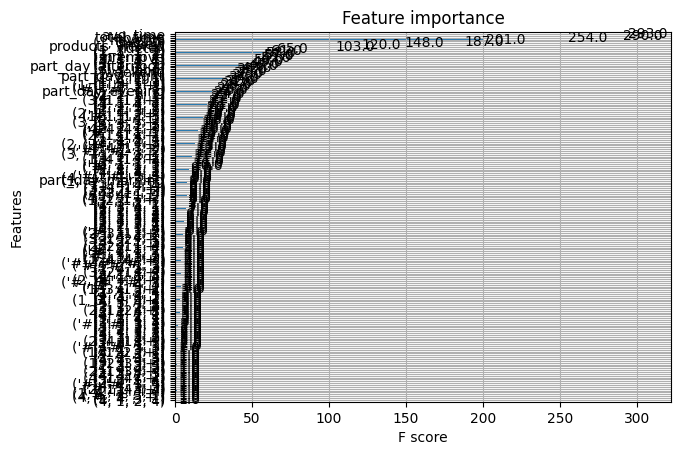

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(xgb_c)
plt.show()

In [ ]:
# Assuming you have a trained XGBoost model `bst`
importance = xgb_c.get_booster().get_score(importance_type='weight')

# Sorting the importance dictionary by the F-scores
sorted_importance = sorted(importance.items(), key=lambda item: item[1], reverse=True)

# Extracting the feature names and their corresponding F-scores
feature_names = [item[0] for item in sorted_importance]
f_scores = [item[1] for item in sorted_importance]

# You would then match these feature names to your dataset columns.



In [ ]:
X_train2.head()

,nevents,weekend,total_time,products_viewed,nview,ndetail,nremove,avg_time,npages,total_mins,...,"(1, 3, 2, 1)","(4, 1, 2, +)","(#, 2, 1, 3)","(2, 3, 1, +)","(4, 2, 1, 4)","(1, 4, 2, 1)","(#, #, 3, 1)","(4, 4, 3, 2)","(1, 3, 1, 2)","(1, 1, 2, 1)"
0,18,0,3478.696,5,12,3,0,193.260889,13,57.978267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,41,1,2612.011,9,19,4,0,63.707585,11,43.533517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,44,0,2692.056,22,11,0,18,61.183091,17,44.867600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,391.502,4,3,1,0,26.100133,12,6.525033,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0,92.009,2,1,0,0,23.002250,3,1.533483,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd

# Example DataFrame with features and their F-scores
# This would typically come from model.get_booster().get_fscore() or a similar method.

# Define a threshold F-score, below which features are considered unimportant
threshold = 15

# Filter the features to retain only those with an F-score above the threshold
important_features = feature_importance_df[feature_importance_df['f_score'] > threshold]

# List of important feature names
important_feature_names = important_features['feature'].tolist()

# Assuming `df` is your original dataset with all features
# Select only the important features for your new dataset
df_1 = X_train2[important_feature_names]
df_2 = X_test2[important_feature_names]
# Now `df_important_features` contains only the features with an F-score above the threshold


KeyError: '[\'(1, 1, 1, 1)\', \'(1, 2, 1, 1)\', \'(1, 1, 1, 2)\', \'(2, 1, 1, 2)\', \'(1, 2, 1, 2)\', \'(2, 1, 1, 1)\', \'(4, 4, 4, 4)\', \'(1, 1, 2, 1)\', \'(3, 1, 1, 1)\', \'(2, 1, 2, 1)\', \'(2, 3, 1, 1)\', \'(1, 3, 1, 1)\', \'(1, 2, 2, 1)\', \'(1, 4, 1, 1)\', \'(1, 2, 1, 3)\', "(1, 1, \'+\', \'+\')", \'(1, 1, 2, 3)\', "(\'#\', \'#\', 1, 1)", \'(2, 2, 1, 1)\', \'(1, 1, 1, 3)\', "(3, 1, 1, \'+\')", \'(4, 1, 1, 1)\', \'(2, 1, 3, 1)\', \'(3, 1, 1, 2)\', \'(4, 1, 4, 4)\', \'(1, 1, 2, 2)\', \'(2, 2, 1, 2)\', \'(1, 2, 3, 1)\', "(1, 1, 1, \'+\')", "(\'#\', 1, 2, 3)", "(2, 1, \'+\', \'+\')", \'(1, 1, 3, 1)\', \'(2, 3, 1, 2)\', \'(4, 1, 4, 1)\', "(3, 1, \'+\', \'+\')", "(4, 4, 4, \'+\')", \'(2, 2, 1, 3)\', \'(3, 1, 2, 1)\', \'(1, 3, 1, 2)\'] not in index'

In [ ]:
import pandas as pd

# Sample data (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'session_id': ['session1', 'session2', 'session3', 'session4'],
#     'actions': [['view', 'view', 'add', 'view', 'purchase'],
#                 ['view', 'add', 'view', 'add', 'purchase'],
#                 ['detail', 'view', 'add', 'purchase'],
#                 ['view', 'detail', 'view', 'add']]
# })

# Function to calculate the action ratios for a given list of actions
def calculate_action_ratios(actions):
    # Count the number of views, details, and adds
    view_count = actions.count('view')
    detail_count = actions.count('detail')
    add_count = actions.count('add')
    remove_count = actions.count('remove')

    # Calculate ratios, avoiding division by zero
    view_to_add_ratio = view_count / add_count if add_count > 0 else 0
    detail_to_add_ratio = detail_count / add_count if add_count > 0 else 0
    view_to_remove_ratio=view_count/remove_count if remove_count >0 else 0
    view_to_detail_ratio=view_count/detail_count if detail_count>0 else 0
    detail_to_remove_ratio=detail_count/remove_count if remove_count>0 else 0
    return view_to_add_ratio, detail_to_add_ratio,view_to_remove_ratio,view_to_detail_ratio,detail_to_remove_ratio

# Apply the function to the 'actions' column to create new ratio columns
train[['view_to_add_ratio', 'detail_to_add_ratio',"view_to_remove_ratio","view_to_detail_ratio","detail_to_remove_ratio"]] = train['product_action'].apply(
    lambda actions: calculate_action_ratios(actions)
).tolist()

val[['view_to_add_ratio', 'detail_to_add_ratio',"view_to_remove_ratio","view_to_detail_ratio","detail_to_remove_ratio"]] = val['product_action'].apply(
    lambda actions: calculate_action_ratios(actions)
).tolist()

# Check the resulting DataFrame
# print(df)


In [ ]:
import pandas as pd

# Assuming df has two columns: 'datetime_list' (a list of datetime strings) and 'page_id_encoded_list' (a list of page IDs).

# First, convert the datetime strings to datetime objects if they are not already.
# df['datetime_list'] = df['datetime_list'].apply(lambda x: [pd.to_datetime(t) for t in x])

# Function to calculate the time spent on each page, considering consecutive same page visits.
def calculate_time_on_pages(datetime_list, page_id_list):
    times_on_pages = []
    previous_page = None
    start_time = None

    for i, (current_page, current_time) in enumerate(zip(page_id_list, datetime_list)):
        if current_page != previous_page:
            if previous_page is not None:
                # Calculate the time spent on the previous page.
                time_spent = (current_time - start_time).total_seconds()
                times_on_pages.append((previous_page, time_spent))
            # Update the start time and page.
            start_time = current_time
        previous_page = current_page

        # If it's the last page, close out the time spent calculation.
        if i == len(page_id_list) - 1:
            time_spent = (current_time - start_time).total_seconds()
            times_on_pages.append((current_page, time_spent))

    # Now we have a list of tuples with (page_id, time_spent). If you need just the times in the same order as page_id_list:
    # time_on_each_page = [time for page, time in sorted(times_on_pages)]
    return times_on_pages

# Apply the function to each row to calculate the time on each page.
# train['time_on_pages'] = train.apply(lambda x: calculate_time_on_pages(x['datetime'], x['page_id_encoded']), axis=1)
val['time_on_pages'] = val.apply(lambda x: calculate_time_on_pages(x['datetime'], x['page_id_encoded']), axis=1)


In [ ]:
train["time_on_pages"][0]

[(11024, 998.119),
 (136348, 6.436),
 (11244, 21.993),
 (241105, 281.069),
 (69975, 166.031),
 (17467, 1694.748),
 (194891, 110.266),
 (214089, 14.68),
 (53975, 1.266),
 (36557, 57.481),
 (49447, 12.105),
 (255325, 111.786),
 (59156, 2.716),
 (11024, 0.0)]

In [ ]:
train["page_id_encoded"][0]

[11024,
 11024,
 136348,
 11244,
 241105,
 69975,
 17467,
 194891,
 214089,
 53975,
 53975,
 36557,
 49447,
 255325,
 255325,
 59156,
 11024,
 11024]

In [ ]:
# make sure to prepare data well to fit a Naive Bayes model on hand-crafted features and apply it to the
# out-of-sample evaluation sessions, which are already featurised - this is the order in which features
# appear in the eval sessions:
#   'nevents', 'weekend', 'part_day', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove'

X_train = train[['nevents', 'weekend', 'part_day', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove']]
Y_train = train['convert']
X_train.head()

,nevents,weekend,part_day,total_time,products_viewed,nview,ndetail,nremove
1104026,8,1,afternoon,188.728,2,3,0,0
600659,5,0,afternoon,912.615,3,0,0,0
1489371,24,1,evening,705.444,8,3,2,0
1634659,5,1,evening,66.766,3,1,0,0
117372,20,0,night,382.972,8,9,3,4


In [ ]:
val=val[["product_action_symb",'nevents', 'weekend', 'part_day', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove',"convert","time_since_last_event","page_id_encoded","time_on_pages"]]

In [ ]:
df2=df2[["product_action_symb",'nevents', 'weekend', 'part_day', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove',"convert","time_since_last_event","page_id_encoded","cum_time"]]

In [ ]:
merged_df.head()

,product_action_symb,nevents,weekend,part_day,total_time,products_viewed,nview,ndetail,nremove,convert,time_since_last_event,page_id_encoded
0,"[2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, ...",33,0,afternoon,253.346,15,6,4,0,0,"[0.0, 5.679, 0.0, 4.032, 0.0, 4.651, 43.525, 0...","[12673, 12673, 4976, 4976, 8503, 8503, 22794, ..."
1,"[1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 1, 4, 4, 4, 1]",16,0,afternoon,214.940,7,5,1,4,1,"[34.852, 9.892, 17.623, 0.0, 94.796, 4.921, 1....","[10003, 2936, 19819, 22459, 22459, 19521, 1644..."
2,"[1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, ...",31,0,evening,392.800,10,7,2,0,0,"[17.785, 70.111, 7.879, 17.982, 0.0, 11.284, 0...","[18699, 5441, 35869, 28621, 24917, 24917, 1851..."
3,"[1, 2, 3, 1, 4, 3, 4, 1, 1, 1, 2, 1, 2]",13,0,night,214.671,7,5,2,2,0,"[0.0, 18.83, 8.853, 62.531, 0.368, 13.291, 15....","[18943, 18943, 19521, 37823, 19521, 19521, 849..."
4,"[2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, ...",17,0,evening,464.860,4,10,0,0,0,"[0.0, 168.34, 0.0, 7.84, 0.0, 75.172, 5.839, 1...","[2972, 2972, 25906, 25906, 2972, 2972, 19521, ..."


In [ ]:
train.head(5)

,product_action_symb,nevents,weekend,part_day,total_time,products_viewed,nview,ndetail,nremove,convert
1104026,"[1, 1, 2, 1, 3, 1, 1, 1]",8,1,afternoon,188.728,2,3,0,0,0
600659,"[2, 1, 2, 1, 3]",5,0,afternoon,912.615,3,0,0,0,0
1489371,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, ...",24,1,evening,705.444,8,3,2,0,0
1634659,"[2, 1, 3, 3, 1]",5,1,evening,66.766,3,1,0,0,0
117372,"[1, 1, 1, 3, 4, 1, 4, 4, 4, 1, 1, 1, 1, 2, 1, ...",20,0,night,382.972,8,9,3,4,0


In [ ]:
X_val= val[['nevents', 'weekend', 'part_day', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove']]
Y_val = val['convert']
X_val.head()
val=val[["product_action_symb",'nevents', 'weekend', 'part_day', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove',"convert"]]

In [ ]:
val.head(5)

,product_action_symb,nevents,weekend,part_day,total_time,products_viewed,nview,ndetail,nremove,convert
1183399,"[1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1, ...",19,0,night,1000.814,4,8,2,0,1
496585,"[1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 3, 1, 2, 1, 3, ...",21,1,evening,258.336,10,6,2,1,1
657494,"[3, 1, 2, 1, 1, 1]",6,0,afternoon,128.091,2,4,1,0,0
552538,"[1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 2, ...",17,1,evening,124.368,8,6,4,0,0
7781,"[1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 4, 3, 2, 1, 1, ...",18,0,night,422.127,7,5,3,1,1


In [ ]:
train.to_csv('/content/drive/MyDrive/AOCD_assignment/hybrid_train.csv', index=False)
val.to_csv('/content/drive/MyDrive/AOCD_assignment/hybrid_validation.csv', index=False)

In [ ]:
merged_df.to_csv('/content/drive/MyDrive/AOCD_assignment/hybrid_test2.csv', index=False)

In [ ]:
df2.to_csv('/content/drive/MyDrive/AOCD_assignment/full_train.csv', index=False)

# Sessions

In [ ]:
# sessionise symbolized events
import pandas as pd
import numpy

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/AOCD_assignment/xgb_train.csv')
val=pd.read_csv('/content/drive/MyDrive/AOCD_assignment/xgb_validation.csv')

In [ ]:
import ast
train["product_action_symb"] = train["product_action_symb"].apply(lambda x: list(ast.literal_eval(x.strip('[]'))))
val["product_action_symb"] = val["product_action_symb"].apply(lambda x: list(ast.literal_eval(x.strip('[]'))))

In [ ]:
train2=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/preprocessed_train.csv")
val2=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/preprocessed_validation.csv")
val_raw=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/raw_validation.csv")

In [ ]:
train_oracle=train2[["product_action_symb","convert"]]
val_oracle=val_raw[["product_action_symb","convert"]]

## Experimental model

Remember to <font color='red'>comment the error analysis</font>! You can use this markdown cell to do it.

In [ ]:
from collections import Counter
X_train["avg_time"]=X_train["total_time"]/X_train["nevents"]
action_counts = X_train['product_action_symb'].apply(lambda x: Counter(x))
for action in range(1, 5):  # Assuming actions are labeled 1 through 4
    X_train[f'action_{action}_count'] = action_counts.apply(lambda x: x[action])

X_val["avg_time"]=X_val["total_time"]/X_val["nevents"]
action_counts = X_val['product_action_symb'].apply(lambda x: Counter(x))
for action in range(1, 5):  # Assuming actions are labeled 1 through 4
    X_val[f'action_{action}_count'] = action_counts.apply(lambda x: x[action])


In [ ]:
len(X_train)

62408

In [ ]:
from collections import Counter

def count_transitions(sequence):
    # Counter for storing the counts of each transition
    transition_counts = Counter()

    # Iterate over the sequence and count the transitions
    for i in range(len(sequence) - 1):
        # Current action and the next action form a transition tuple
        transition = (sequence[i], sequence[i+1])
        transition_counts[transition] += 1

    return transition_counts

# Applying the function to each sequence in the DataFrame and summing the counts
# X_train['product_action_symb'].apply(count_transitions).sum()
X_val['product_action_symb'].apply(count_transitions).sum()

Counter({(1, 1): 109674,
         (1, 2): 55428,
         (2, 3): 7655,
         (3, 1): 14360,
         (2, 1): 50011,
         (2, 2): 6962,
         (1, 3): 10167,
         (1, 4): 3465,
         (4, 1): 4058,
         (3, 2): 1475,
         (4, 3): 567,
         (2, 4): 275,
         (4, 4): 2438,
         (3, 4): 1504,
         (3, 3): 962,
         (4, 2): 15})

In [ ]:
# Suppose we know that actions go from 1 to 4, so possible transitions are (1,2), (2,3), etc.
possible_transitions = [(i, j) for i in range(1, 5) for j in range(1, 5) if i != j]

# Initialize columns in the DataFrame for each possible transition
for transition in possible_transitions:
    X_train[f'transition_{transition}'] = 0

# Function to update the DataFrame with transition counts for a given sequence
def update_transition_counts(row):
    transition_counts = count_transitions(row['product_action_symb'])
    for transition, count in transition_counts.items():
        row[f'transition_{transition}'] = count
    return row

# Apply the function to each row in the DataFrame
# X_train = X_train.apply(update_transition_counts, axis=1)
X_val = X_val.apply(update_transition_counts, axis=1)

In [ ]:
del X_train["product_action_symb"]
del X_val["product_action_symb"]

In [ ]:
X_train.head()

,action_1_count,action_2_count,action_3_count,action_4_count,avg_time,ndetail,nevents,nremove,nview,part_day_afternoon,...,"transition_(2, 4)","transition_(3, 1)","transition_(3, 2)","transition_(3, 3)","transition_(3, 4)","transition_(4, 1)","transition_(4, 2)","transition_(4, 3)","transition_(4, 4)",weekend
0,6,1,1,0,23.5910,0,8,0,3,1,...,0,0,0,0.0,0,0,0,0,0.0,1
1,2,2,1,0,182.5230,0,5,0,0,1,...,0,0,0,0.0,0,0,0,0,0.0,0
2,16,6,2,0,29.3935,2,24,0,3,0,...,0,0,0,0.0,0,0,0,0,0.0,1
3,2,1,2,0,13.3532,0,5,0,1,0,...,0,0,0,1.0,0,0,0,0,0.0,1
4,12,3,1,4,19.1486,3,20,4,9,0,...,0,0,0,0.0,0,0,0,0,2.0,0


In [ ]:
X_train=train.drop("convert",axis=1)
y_train=train["convert"]
X_val=val.drop("convert",axis=1)
y_val=val["convert"]

In [ ]:
del train["convert"]
del val["convert"]

In [ ]:
train = pd.get_dummies(train, columns=['part_day'], prefix='part_day')
train.head()
val = pd.get_dummies(val, columns=['part_day'], prefix='part_day')
val.head()

KeyError: "None of [Index(['part_day'], dtype='object')] are in the [columns]"

In [ ]:
# del train["embedding_feature_0"]
# del train["embedding_feature_1"]
# del train["embedding_feature_2"]
# del train["embedding_feature_3"]
# del val["embedding_feature_0"]
# del val["embedding_feature_1"]
# del val["embedding_feature_2"]
# del val["embedding_feature_3"]
del train["nremove"]
del val["nremove"]

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(val)
print(classification_report(y_val, y_pred))

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:product_action_symb: object

In [ ]:
import numpy as np

def ngram_featurizer(session, n):

    """takes in a list and an integer defining the size of ngrams.
     Returns the ngrams of desired size in the input string"""

    session = ['#']*(n-1) + session + ['+']*(n-1)
    ngrams = [tuple(session[i:i+n]) for i in range(len(session)-n+1)]

    return ngrams


def encode_sessions(sessions, n, mapping=None):

    """
    Takes in a list of lists, an integer indicating the character ngrams' size,
    and a dictionary mapping ngrams to numerical indices. If no dictionary is passed,
    one is created inside the function.
    The function outputs a 2d NumPy array with as many rows as there are strings in
    the input list, and the mapping from ngrams to indices, representing the columns
    of the NumPy array.
    """

    if not mapping:
        all_ngrams = set()
        for session in sessions:
            all_ngrams = all_ngrams.union(set(ngram_featurizer(session, n)))

        mapping = {ngram: i for i, ngram in enumerate(all_ngrams)}

    X = np.zeros((len(sessions), len(mapping)))
    for i, session in enumerate(sessions):
        for ngram in ngram_featurizer(session, n):
            try:
                X[i, mapping[ngram]] += 1
            except KeyError:
                pass

    return X, mapping

    # Assuming you have your X_train DataFrame and a column 'session_column' containing the sequences
sessions = X_train_adasyn['product_action_symb'].tolist()
sessions2 = X_val['product_action_symb'].tolist()
# Generate n-gram features
n = 4  # Example n-gram size
X_ngrams, mapping = encode_sessions(sessions, n)
X_ngrams2, _ = encode_sessions(sessions2, n,mapping=mapping)
# Convert n-gram features to DataFrame
ngram_df = pd.DataFrame(X_ngrams, columns=mapping.keys())
ngram_df2 = pd.DataFrame(X_ngrams2, columns=mapping.keys())
# Concatenate n-gram DataFrame with the original X_train DataFrame
# Ensure that indexes align if X_train and ngram_df have the same row order
X_train2 = pd.concat([X_train_adasyn.reset_index(drop=True), ngram_df.reset_index(drop=True)], axis=1)
X_val2 = pd.concat([X_val.reset_index(drop=True), ngram_df2.reset_index(drop=True)], axis=1)
# Now X_train_extended contains the original features plus the n-gram features

In [ ]:
# Assuming you have your X_train DataFrame and a column 'session_column' containing the sequences
sessions = X_train_adasyn['product_action_symb'].tolist()
sessions2 = X_val['product_action_symb'].tolist()
# Generate n-gram features
n = 4  # Example n-gram size
X_ngrams, mapping = encode_sessions(sessions, n)
X_ngrams2, _ = encode_sessions(sessions2, n,mapping=mapping)
# Convert n-gram features to DataFrame
ngram_df = pd.DataFrame(X_ngrams, columns=mapping.keys())
ngram_df2 = pd.DataFrame(X_ngrams2, columns=mapping.keys())
# Concatenate n-gram DataFrame with the original X_train DataFrame
# Ensure that indexes align if X_train and ngram_df have the same row order
X_train2 = pd.concat([X_train_adasyn.reset_index(drop=True), ngram_df.reset_index(drop=True)], axis=1)
X_val2 = pd.concat([X_val.reset_index(drop=True), ngram_df2.reset_index(drop=True)], axis=1)
# Now X_train_extended contains the original features plus the n-gram features


KeyError: 'product_action_symb'

In [ ]:
del X_train2["product_action_symb"]
del X_val2["product_action_symb"]

KeyError: 'product_action_symb'

In [ ]:
from xgboost import XGBClassifier
from keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE,ADASYN
# train_sequences = list(X_train)
# val_sequences = list(X_val)
# max_sequence_length = max(len(x) for x in train_sequences)
# padded_train_sequences = pad_sequences(train_sequences, maxlen=40, padding='post', value=-1)
# padded_val_sequences = pad_sequences(val_sequences,maxlen=40, padding='post', value=-1)
# X_train = np.array(padded_train_sequences)
# X_val = np.array(padded_val_sequences)
# y_train_final = y_train.values
# y_val_final = y_val.values
# For the training set
# X_train2.columns = ['_'.join(str(col) for col in col_tuple) if isinstance(col_tuple, tuple) else str(col_tuple) for col_tuple in X_train2.columns]

# For the validation set
# X_val2.columns = ['_'.join(str(col) for col in col_tuple) if isinstance(col_tuple, tuple) else str(col_tuple) for col_tuple in X_val2.columns]

# Now, you can use these DataFrames for training and validation in XGBoost

adasyn =ADASYN(random_state=42)
X_train_adasyn,y_train_adasyn =adasyn.fit_resample(X_train,y_train)


In [ ]:
X_train.head()

,action_1_count,action_2_count,action_3_count,action_4_count,avg_time,ndetail,nevents,nremove,nview,part_day_afternoon,...,"transition_(2, 4)","transition_(3, 1)","transition_(3, 2)","transition_(3, 3)","transition_(3, 4)","transition_(4, 1)","transition_(4, 2)","transition_(4, 3)","transition_(4, 4)",weekend
0,6,1,1,0,23.5910,0,8,0,3,1,...,0,0,0,0.0,0,0,0,0,0.0,1
1,2,2,1,0,182.5230,0,5,0,0,1,...,0,0,0,0.0,0,0,0,0,0.0,0
2,16,6,2,0,29.3935,2,24,0,3,0,...,0,0,0,0.0,0,0,0,0,0.0,1
3,2,1,2,0,13.3532,0,5,0,1,0,...,0,0,0,1.0,0,0,0,0,0.0,1
4,12,3,1,4,19.1486,3,20,4,9,0,...,0,0,0,0.0,0,0,0,0,2.0,0


In [ ]:
del X_train_adasyn["part_day_morning"]
del X_train_adasyn["part_day_afternoon"]
# del X_train_adasyn["weekend"]
del X_val["part_day_morning"]
del X_val["part_day_afternoon"]
# del X_val["weekend"]

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
xgb = xgb.XGBClassifier(random_state=42)
xgb_clf2=xgb.fit(X_train, y_train)
y_pred = xgb_clf2.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     12116
           1       0.53      0.28      0.36      3487

    accuracy                           0.78     15603
   macro avg       0.67      0.60      0.62     15603
weighted avg       0.75      0.78      0.76     15603



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
xgb = xgb.XGBClassifier(random_state=42)
xgb_clf=xgb.fit(X_train_adasyn, y_train_adasyn)
y_pred = xgb_clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     12116
           1       0.41      0.51      0.46      3487

    accuracy                           0.73     15603
   macro avg       0.63      0.65      0.64     15603
weighted avg       0.75      0.73      0.74     15603



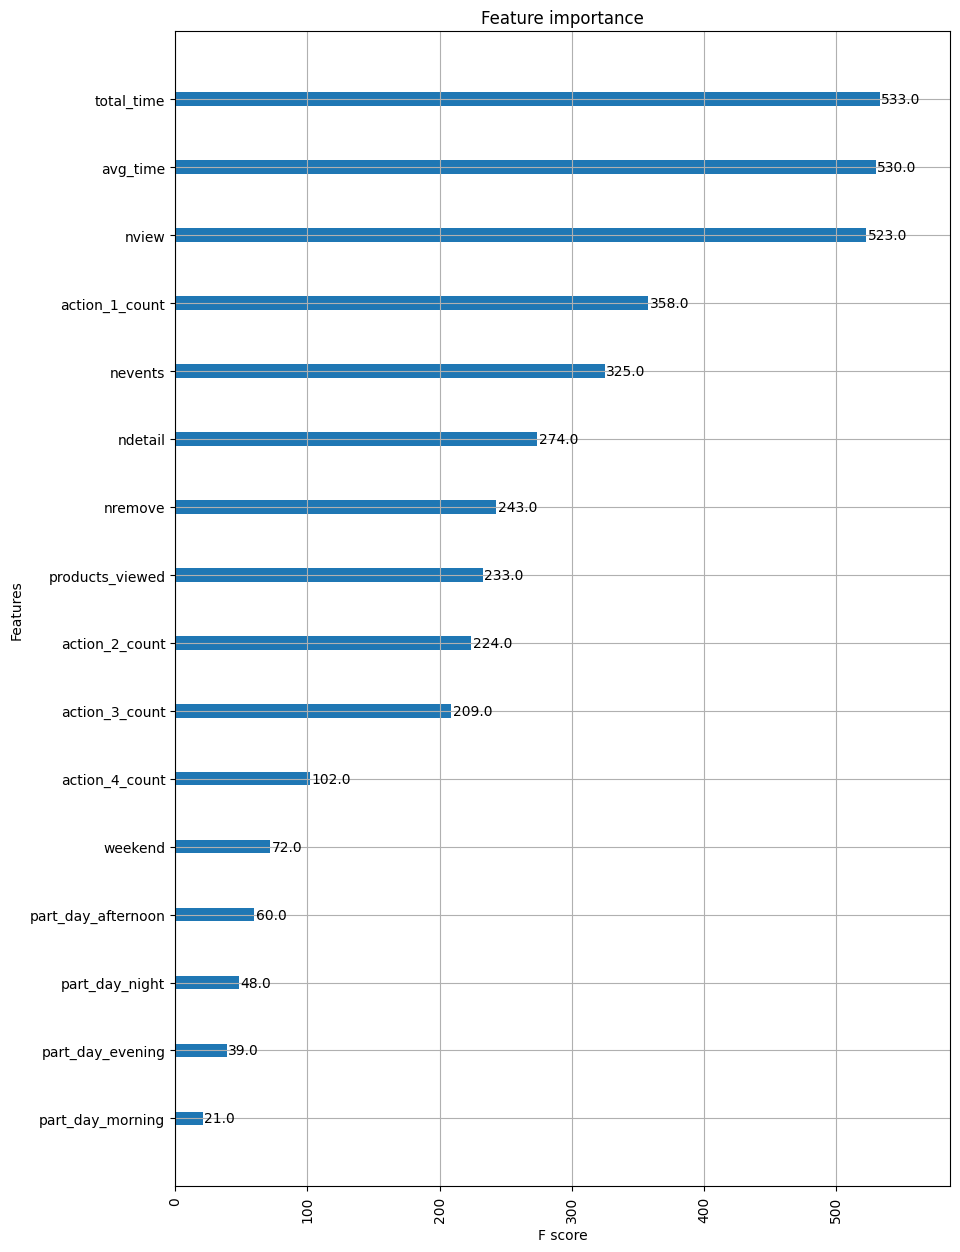

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming `xgb_clf` is your trained model
fig, ax = plt.subplots(figsize=(10, 15))  # Adjust the figure size as necessary
xgb.plot_importance(xgb_clf2, ax=ax, importance_type='weight', max_num_features=100)  # Show top 30 features

# Rotate the feature names to vertical
plt.xticks(rotation='vertical')

# Increase font size
plt.rcParams.update({'font.size': 10})

plt.show()


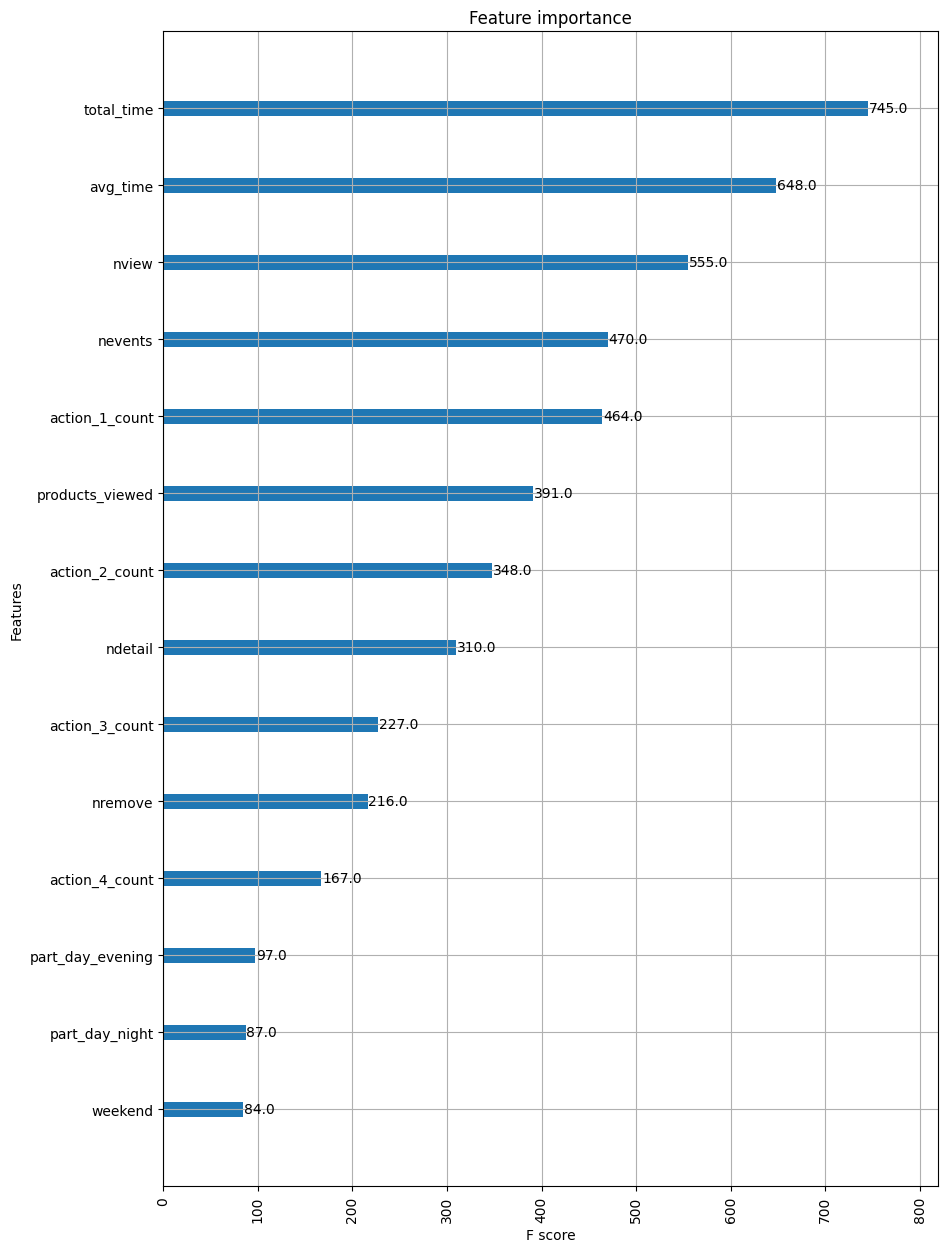

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming `xgb_clf` is your trained model
fig, ax = plt.subplots(figsize=(10, 15))  # Adjust the figure size as necessary
xgb.plot_importance(xgb_clf, ax=ax, importance_type='weight', max_num_features=100)  # Show top 30 features

# Rotate the feature names to vertical
plt.xticks(rotation='vertical')

# Increase font size
plt.rcParams.update({'font.size': 10})

plt.show()


In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_train_adasyn)  # Assuming X_train is your training dataset

# Plot the SHAP values for the first instance
shap.plots.waterfall(shap_values[0])


KeyboardInterrupt: 